In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('api_keys.env')

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Import alpaca-py as alpaca
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoLatestQuoteRequest, CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

In [5]:
# Declaring variable for client
client = CryptoHistoricalDataClient()

In [6]:
# Setting up params for request
request_params = CryptoLatestQuoteRequest(symbol_or_symbols="BTC/USD")

In [7]:
# Grabbing latest price with client
latest_quote = client.get_crypto_latest_quote(request_params)

In [8]:
# must use symbol to access even though it is single symbol
latest_quote["BTC/USD"].ask_price

29432.0

In [9]:
# Updating params for historical price data
request_params = CryptoBarsRequest(
                        symbol_or_symbols=["BTC/USD"],
                        timeframe=TimeFrame.Day,
                        start=datetime.strptime("2020-04-01", '%Y-%m-%d')
                        )

In [10]:
# Grabbing historical data
bars = client.get_crypto_bars(request_params)

In [11]:
# convert to dataframe
bars.df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-04-26 05:00:00+00:00  28347.67  30046.27  27261.01  29119.00   
        2023-04-27 05:00:00+00:00  29119.00  29912.28  28646.88  29537.16   
        2023-04-28 05:00:00+00:00  29542.61  29608.47  28922.03  29420.00   
        2023-04-29 05:00:00+00:00  29422.55  29478.08  29082.47  29253.01   
        2023-04-30 05:00:00+00:00  29253.22  29985.57  29195.13  29439.76   

                                        volume  trade_count          vwap  
symbol  timestamp                                                          
BTC/USD 2020-04-08 05:00:00+00:00      0.00010          1.0   7314.000000  
        2020-04-14 05:00:00+00:00      0.00020          2.0   7100.750000  
        2020-04-22 05:00:00+00:00      0.00010          1.0   7118.500000  
        2020-04-28 05:00:00+00:00      0.08400          2.0   7835.687500  
        2020-04-30 05:00:00+00:00      0.01340          3.0   8715.805970  
...                                        ...          ...           ...  
        2023-04-26 05:00:00+00:00  18213.97439     293900.0  28896.311317  
        2023-04-27 05:00:00+00:00  12426.37468     191033.0  29293.601142  
        2023-04-28 05:00:00+00:00   5359.16699      89234.0  29297.208936  
        2023-04-29 05:00:00+00:00   1871.82263      41177.0  29292.215641  
        2023-04-30 05:00:00+00:00   3663.25326      69085.0  29546.320019  

[1088 rows x 7 columns]

In [12]:
# Setting as dataframe variable
btc_df = bars.df
btc_df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-04-26 05:00:00+00:00  28347.67  30046.27  27261.01  29119.00   
        2023-04-27 05:00:00+00:00  29119.00  29912.28  28646.88  29537.16   
        2023-04-28 05:00:00+00:00  29542.61  29608.47  28922.03  29420.00   
        2023-04-29 05:00:00+00:00  29422.55  29478.08  29082.47  29253.01   
        2023-04-30 05:00:00+00:00  29253.22  29985.57  29195.13  29439.76   

                                        volume  trade_count          vwap  
symbol  timestamp                                                          
BTC/USD 2020-04-08 05:00:00+00:00      0.00010          1.0   7314.000000  
        2020-04-14 05:00:00+00:00      0.00020          2.0   7100.750000  
        2020-04-22 05:00:00+00:00      0.00010          1.0   7118.500000  
        2020-04-28 05:00:00+00:00      0.08400          2.0   7835.687500  
        2020-04-30 05:00:00+00:00      0.01340          3.0   8715.805970  
...                                        ...          ...           ...  
        2023-04-26 05:00:00+00:00  18213.97439     293900.0  28896.311317  
        2023-04-27 05:00:00+00:00  12426.37468     191033.0  29293.601142  
        2023-04-28 05:00:00+00:00   5359.16699      89234.0  29297.208936  
        2023-04-29 05:00:00+00:00   1871.82263      41177.0  29292.215641  
        2023-04-30 05:00:00+00:00   3663.25326      69085.0  29546.320019  

[1088 rows x 7 columns]

In [13]:
# Checking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1088 entries, ('BTC/USD', Timestamp('2020-04-08 05:00:00+0000', tz='UTC')) to ('BTC/USD', Timestamp('2023-04-30 05:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         1088 non-null   float64
 1   high         1088 non-null   float64
 2   low          1088 non-null   float64
 3   close        1088 non-null   float64
 4   volume       1088 non-null   float64
 5   trade_count  1088 non-null   float64
 6   vwap         1088 non-null   float64
dtypes: float64(7)
memory usage: 103.7+ KB


In [14]:
# Reset index to access symbol and timestamp as columns
btc_df = btc_df.reset_index()
btc_df.head()

symbol                 timestamp    open    high     low   close  volume  \
0  BTC/USD 2020-04-08 05:00:00+00:00  7314.0  7314.0  7314.0  7314.0  0.0001   
1  BTC/USD 2020-04-14 05:00:00+00:00  7101.5  7101.5  7100.0  7100.0  0.0002   
2  BTC/USD 2020-04-22 05:00:00+00:00  7118.5  7118.5  7118.5  7118.5  0.0001   
3  BTC/USD 2020-04-28 05:00:00+00:00  7748.5  7836.0  7748.5  7836.0  0.0840   
4  BTC/USD 2020-04-30 05:00:00+00:00  8829.0  8829.0  8653.0  8653.0  0.0134   

   trade_count        vwap  
0          1.0  7314.00000  
1          2.0  7100.75000  
2          1.0  7118.50000  
3          2.0  7835.68750  
4          3.0  8715.80597

In [15]:
# Revising time out of timestamp column
import datetime as dt
btc_df['timestamp'] = btc_df['timestamp'].dt.date
btc_df.head()

symbol   timestamp    open    high     low   close  volume  trade_count  \
0  BTC/USD  2020-04-08  7314.0  7314.0  7314.0  7314.0  0.0001          1.0   
1  BTC/USD  2020-04-14  7101.5  7101.5  7100.0  7100.0  0.0002          2.0   
2  BTC/USD  2020-04-22  7118.5  7118.5  7118.5  7118.5  0.0001          1.0   
3  BTC/USD  2020-04-28  7748.5  7836.0  7748.5  7836.0  0.0840          2.0   
4  BTC/USD  2020-04-30  8829.0  8829.0  8653.0  8653.0  0.0134          3.0   

         vwap  
0  7314.00000  
1  7100.75000  
2  7118.50000  
3  7835.68750  
4  8715.80597

In [16]:
# Setting up pivot to get subset of closing prices
btc_pivot = btc_df.pivot_table(values='close', index='timestamp', columns='symbol')
btc_pivot.head()

symbol      BTC/USD
timestamp          
2020-04-08   7314.0
2020-04-14   7100.0
2020-04-22   7118.5
2020-04-28   7836.0
2020-04-30   8653.0

In [17]:
# Checking for nulls
btc_pivot.isnull().sum()

symbol
BTC/USD    0
dtype: int64

In [18]:
# Running percentage change calculation and conversion
btc_daily = btc_pivot.pct_change()
btc_daily.head()

symbol       BTC/USD
timestamp           
2020-04-08       NaN
2020-04-14 -0.029259
2020-04-22  0.002606
2020-04-28  0.100794
2020-04-30  0.104262

In [19]:
# Recheck nulls
btc_daily.isnull().sum()

symbol
BTC/USD    1
dtype: int64

In [20]:
# Drop nulls
btc_daily = btc_daily.dropna()
btc_daily.head()

symbol       BTC/USD
timestamp           
2020-04-14 -0.029259
2020-04-22  0.002606
2020-04-28  0.100794
2020-04-30  0.104262
2020-05-01  0.018895

In [21]:
# Checking info
btc_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1087 entries, 2020-04-14 to 2023-04-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC/USD  1087 non-null   float64
dtypes: float64(1)
memory usage: 17.0+ KB


In [22]:
# Setting up dependencies for stock price data
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest

In [23]:
# keys required for stock historical data client
stock_client = StockHistoricalDataClient(alpaca_api_key, alpaca_secret_key)

In [24]:
# params request for multiple tickers
multisymbol_request_params = StockBarsRequest(symbol_or_symbols=["SPY", "GLD", "TLT"],
                                              timeframe=TimeFrame.Day, 
                                              start=datetime.strptime("2020-04-08", '%Y-%m-%d')
                                             )

In [25]:
# pulling data
historical_quotes = stock_client.get_stock_bars(multisymbol_request_params)

In [26]:
# Display as dataframe
historical_quotes.df

open      high       low   close  \
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00  155.91  155.9400  154.5900  154.65   
       2020-04-09 04:00:00+00:00  158.08  159.0800  157.2100  158.58   
       2020-04-13 04:00:00+00:00  159.17  162.3800  158.6250  161.41   
       2020-04-14 04:00:00+00:00  162.73  164.4200  161.7800  162.66   
       2020-04-15 04:00:00+00:00  161.80  162.5400  160.8061  162.00   
...                                  ...       ...       ...     ...   
TLT    2023-04-24 04:00:00+00:00  104.96  105.4875  104.8400  105.41   
       2023-04-25 04:00:00+00:00  106.33  107.1300  106.2800  106.96   
       2023-04-26 04:00:00+00:00  106.79  107.2400  105.6700  105.82   
       2023-04-27 04:00:00+00:00  105.20  105.2700  104.6100  104.77   
       2023-04-28 04:00:00+00:00  106.21  106.7600  105.8600  106.46   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-04-24 04:00:00+00:00  17035762.0      83376.0  105.290770  
       2023-04-25 04:00:00+00:00  21908546.0     141017.0  106.836469  
       2023-04-26 04:00:00+00:00  19615333.0     117843.0  106.235620  
       2023-04-27 04:00:00+00:00  20247619.0     108852.0  104.854365  
       2023-04-28 04:00:00+00:00  23824193.0     128162.0  106.340339  

[2310 rows x 7 columns]

In [27]:
# Save as df variable
stock_df = historical_quotes.df
stock_df

open      high       low   close  \
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00  155.91  155.9400  154.5900  154.65   
       2020-04-09 04:00:00+00:00  158.08  159.0800  157.2100  158.58   
       2020-04-13 04:00:00+00:00  159.17  162.3800  158.6250  161.41   
       2020-04-14 04:00:00+00:00  162.73  164.4200  161.7800  162.66   
       2020-04-15 04:00:00+00:00  161.80  162.5400  160.8061  162.00   
...                                  ...       ...       ...     ...   
TLT    2023-04-24 04:00:00+00:00  104.96  105.4875  104.8400  105.41   
       2023-04-25 04:00:00+00:00  106.33  107.1300  106.2800  106.96   
       2023-04-26 04:00:00+00:00  106.79  107.2400  105.6700  105.82   
       2023-04-27 04:00:00+00:00  105.20  105.2700  104.6100  104.77   
       2023-04-28 04:00:00+00:00  106.21  106.7600  105.8600  106.46   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-04-24 04:00:00+00:00  17035762.0      83376.0  105.290770  
       2023-04-25 04:00:00+00:00  21908546.0     141017.0  106.836469  
       2023-04-26 04:00:00+00:00  19615333.0     117843.0  106.235620  
       2023-04-27 04:00:00+00:00  20247619.0     108852.0  104.854365  
       2023-04-28 04:00:00+00:00  23824193.0     128162.0  106.340339  

[2310 rows x 7 columns]

In [28]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2310 entries, ('GLD', Timestamp('2020-04-08 04:00:00+0000', tz='UTC')) to ('TLT', Timestamp('2023-04-28 04:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         2310 non-null   float64
 1   high         2310 non-null   float64
 2   low          2310 non-null   float64
 3   close        2310 non-null   float64
 4   volume       2310 non-null   float64
 5   trade_count  2310 non-null   float64
 6   vwap         2310 non-null   float64
dtypes: float64(7)
memory usage: 155.5+ KB


In [29]:
# Reset index to access symbol and timestamp as columns
stock_df = stock_df.reset_index()
stock_df.head()

symbol                 timestamp    open    high       low   close  \
0    GLD 2020-04-08 04:00:00+00:00  155.91  155.94  154.5900  154.65   
1    GLD 2020-04-09 04:00:00+00:00  158.08  159.08  157.2100  158.58   
2    GLD 2020-04-13 04:00:00+00:00  159.17  162.38  158.6250  161.41   
3    GLD 2020-04-14 04:00:00+00:00  162.73  164.42  161.7800  162.66   
4    GLD 2020-04-15 04:00:00+00:00  161.80  162.54  160.8061  162.00   

       volume  trade_count        vwap  
0   7600804.0      60704.0  155.233884  
1  18123039.0     140239.0  158.255634  
2  20549213.0     140401.0  160.906373  
3  17095086.0     146336.0  163.197557  
4  12141890.0      95518.0  161.749049

In [30]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       2310 non-null   object             
 1   timestamp    2310 non-null   datetime64[ns, UTC]
 2   open         2310 non-null   float64            
 3   high         2310 non-null   float64            
 4   low          2310 non-null   float64            
 5   close        2310 non-null   float64            
 6   volume       2310 non-null   float64            
 7   trade_count  2310 non-null   float64            
 8   vwap         2310 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 162.5+ KB


In [31]:
# Revising time out of timestamp column
stock_df['timestamp'] = stock_df['timestamp'].dt.date
stock_df.head()

symbol   timestamp    open    high       low   close      volume  \
0    GLD  2020-04-08  155.91  155.94  154.5900  154.65   7600804.0   
1    GLD  2020-04-09  158.08  159.08  157.2100  158.58  18123039.0   
2    GLD  2020-04-13  159.17  162.38  158.6250  161.41  20549213.0   
3    GLD  2020-04-14  162.73  164.42  161.7800  162.66  17095086.0   
4    GLD  2020-04-15  161.80  162.54  160.8061  162.00  12141890.0   

   trade_count        vwap  
0      60704.0  155.233884  
1     140239.0  158.255634  
2     140401.0  160.906373  
3     146336.0  163.197557  
4      95518.0  161.749049

In [32]:
# Subset of SPY only
loc_df = stock_df.loc[(stock_df.symbol == 'SPY'), :]
loc_df.head()

symbol   timestamp    open      high       low   close       volume  \
770    SPY  2020-04-08  267.96  276.0000  265.2542  274.00  153774487.0   
771    SPY  2020-04-09  277.58  281.2000  275.4700  278.22  190283195.0   
772    SPY  2020-04-13  277.14  277.5100  271.4100  275.63  114868253.0   
773    SPY  2020-04-14  280.98  284.9000  275.5106  283.80  134143470.0   
774    SPY  2020-04-15  277.57  283.9407  275.4600  277.75  121779042.0   

     trade_count        vwap  
770     950859.0  271.051454  
771    1171999.0  278.251697  
772     752225.0  274.512847  
773     761246.0  282.089774  
774     711140.0  277.826041

In [33]:
# Pivot for SPY
spy_pivot = loc_df.pivot_table(values='close', index='timestamp', columns='symbol')
spy_pivot.head()

symbol         SPY
timestamp         
2020-04-08  274.00
2020-04-09  278.22
2020-04-13  275.63
2020-04-14  283.80
2020-04-15  277.75

In [34]:
# Checking info
spy_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, 2020-04-08 to 2023-04-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     770 non-null    float64
dtypes: float64(1)
memory usage: 12.0+ KB


In [35]:
# Running percentage change calculation and conversion
spy_daily = spy_pivot.pct_change()
spy_daily.head()

symbol           SPY
timestamp           
2020-04-08       NaN
2020-04-09  0.015401
2020-04-13 -0.009309
2020-04-14  0.029641
2020-04-15 -0.021318

In [36]:
# Dropping nulls
spy_daily = spy_daily.dropna()
spy_daily.head()

symbol           SPY
timestamp           
2020-04-09  0.015401
2020-04-13 -0.009309
2020-04-14  0.029641
2020-04-15 -0.021318
2020-04-16  0.004356

In [37]:
# Subset of GLD only
gld_df = stock_df.loc[(stock_df.symbol == 'GLD'), :]
gld_df.head()

symbol   timestamp    open    high       low   close      volume  \
0    GLD  2020-04-08  155.91  155.94  154.5900  154.65   7600804.0   
1    GLD  2020-04-09  158.08  159.08  157.2100  158.58  18123039.0   
2    GLD  2020-04-13  159.17  162.38  158.6250  161.41  20549213.0   
3    GLD  2020-04-14  162.73  164.42  161.7800  162.66  17095086.0   
4    GLD  2020-04-15  161.80  162.54  160.8061  162.00  12141890.0   

   trade_count        vwap  
0      60704.0  155.233884  
1     140239.0  158.255634  
2     140401.0  160.906373  
3     146336.0  163.197557  
4      95518.0  161.749049

In [38]:
# Pivot for GLD
gld_pivot = gld_df.pivot_table(values='close', index='timestamp', columns='symbol')
gld_pivot.head()

symbol         GLD
timestamp         
2020-04-08  154.65
2020-04-09  158.58
2020-04-13  161.41
2020-04-14  162.66
2020-04-15  162.00

In [39]:
# Checking info
gld_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, 2020-04-08 to 2023-04-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     770 non-null    float64
dtypes: float64(1)
memory usage: 12.0+ KB


In [40]:
# Running percentage change calculation and conversion
gld_daily = gld_pivot.pct_change()
gld_daily.head()

symbol           GLD
timestamp           
2020-04-08       NaN
2020-04-09  0.025412
2020-04-13  0.017846
2020-04-14  0.007744
2020-04-15 -0.004058

In [41]:
# Dropping nulls
gld_daily = gld_daily.dropna()
gld_daily.head()

symbol           GLD
timestamp           
2020-04-09  0.025412
2020-04-13  0.017846
2020-04-14  0.007744
2020-04-15 -0.004058
2020-04-16 -0.001790

In [42]:
# Subset of TLT only
tlt_df = stock_df.loc[(stock_df.symbol == 'TLT'), :]
tlt_df.head()

symbol   timestamp    open    high     low   close      volume  \
1540    TLT  2020-04-08  165.11  166.19  164.13  165.09  10147077.0   
1541    TLT  2020-04-09  164.28  165.79  163.78  165.39  14260806.0   
1542    TLT  2020-04-13  164.75  165.71  163.88  163.88   8750297.0   
1543    TLT  2020-04-14  163.84  164.74  163.48  163.84   9019531.0   
1544    TLT  2020-04-15  166.80  168.60  166.74  168.18  10027752.0   

      trade_count        vwap  
1540      63686.0  165.217491  
1541      82515.0  164.996594  
1542      60771.0  164.679842  
1543      62051.0  164.073826  
1544      63827.0  167.874800

In [43]:
# Pivot for TLT
tlt_pivot = tlt_df.pivot_table(values='close', index='timestamp', columns='symbol')
tlt_pivot.head()

symbol         TLT
timestamp         
2020-04-08  165.09
2020-04-09  165.39
2020-04-13  163.88
2020-04-14  163.84
2020-04-15  168.18

In [44]:
# Checking info
tlt_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, 2020-04-08 to 2023-04-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TLT     770 non-null    float64
dtypes: float64(1)
memory usage: 12.0+ KB


In [45]:
# Running percentage change calculation and conversion
tlt_daily = tlt_pivot.pct_change()
tlt_daily.head()

symbol           TLT
timestamp           
2020-04-08       NaN
2020-04-09  0.001817
2020-04-13 -0.009130
2020-04-14 -0.000244
2020-04-15  0.026489

In [46]:
# Dropping nulls
tlt_daily = tlt_daily.dropna()
tlt_daily.head()

symbol           TLT
timestamp           
2020-04-09  0.001817
2020-04-13 -0.009130
2020-04-14 -0.000244
2020-04-15  0.026489
2020-04-16  0.011357

In [47]:
# Running cumprod (cumulative product) function over BTC Daily Returns to calculate overall gain / loss
BTC_cumprod = (1 + btc_daily).cumprod()
BTC_prod_annotation = (BTC_cumprod.iloc[-1][0]*100).round().astype(int)
BTC_cumprod.head()

symbol       BTC/USD
timestamp           
2020-04-14  0.970741
2020-04-22  0.973270
2020-04-28  1.071370
2020-04-30  1.183074
2020-05-01  1.205428

In [48]:
# Running cumprod (cumulative product) function over SPY Daily Returns to calculate overall gain / loss
SPY_cumprod = (1 + spy_daily).cumprod()
SPY_prod_annotation = (SPY_cumprod.iloc[-1][0]*100).round().astype(int)
SPY_cumprod.head()

symbol           SPY
timestamp           
2020-04-09  1.015401
2020-04-13  1.005949
2020-04-14  1.035766
2020-04-15  1.013686
2020-04-16  1.018102

In [49]:
# Running cumprod (cumulative product) function over GLD Daily Returns to calculate overall gain / loss
GLD_cumprod = (1 + gld_daily).cumprod()
GLD_prod_annotation = (GLD_cumprod.iloc[-1][0]*100).round().astype(int)
GLD_cumprod.head()

symbol           GLD
timestamp           
2020-04-09  1.025412
2020-04-13  1.043712
2020-04-14  1.051794
2020-04-15  1.047527
2020-04-16  1.045651

In [50]:
# Running cumprod (cumulative product) function over TLT Daily Returns to calculate overall gain / loss
TLT_cumprod = (1 + tlt_daily).cumprod()
TLT_prod_annotation = (TLT_cumprod.iloc[-1][0]*100).round().astype(int)
TLT_cumprod.head()

symbol           TLT
timestamp           
2020-04-09  1.001817
2020-04-13  0.992671
2020-04-14  0.992428
2020-04-15  1.018717
2020-04-16  1.030287

In [51]:
# Running cumulative return against initial investment to obtain current market value of investment in BTC
initial_investment = 10000
btc_profit = initial_investment * BTC_cumprod
btc_annotation = btc_profit.iloc[-1][0].round().astype(int)
btc_profit.head()

symbol           BTC/USD
timestamp               
2020-04-14   9707.410446
2020-04-22   9732.704403
2020-04-28  10713.699754
2020-04-30  11830.735576
2020-05-01  12054.279464

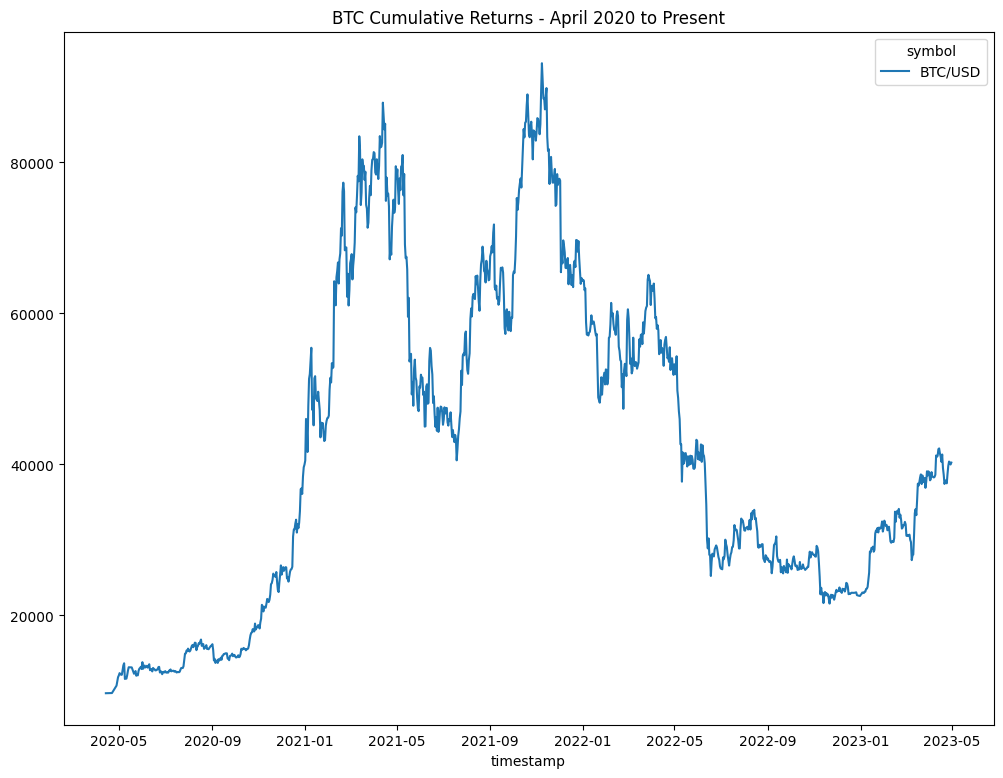

In [52]:
# Plot performance and save to Images
import matplotlib.pyplot as plt
btc_profit.plot(figsize=(12,9), legend=True, title="BTC Cumulative Returns - April 2020 to Present");
plt.savefig("Images/BTCCumulativeReturns.png")

In [53]:
# Running cumulative return against initial investment to obtain current market value of investment in SPY
spy_profit = initial_investment * SPY_cumprod
spy_annotation = spy_profit.iloc[-1][0].round().astype(int)
spy_profit.head()

symbol               SPY
timestamp               
2020-04-09  10154.014599
2020-04-13  10059.489051
2020-04-14  10357.664234
2020-04-15  10136.861314
2020-04-16  10181.021898

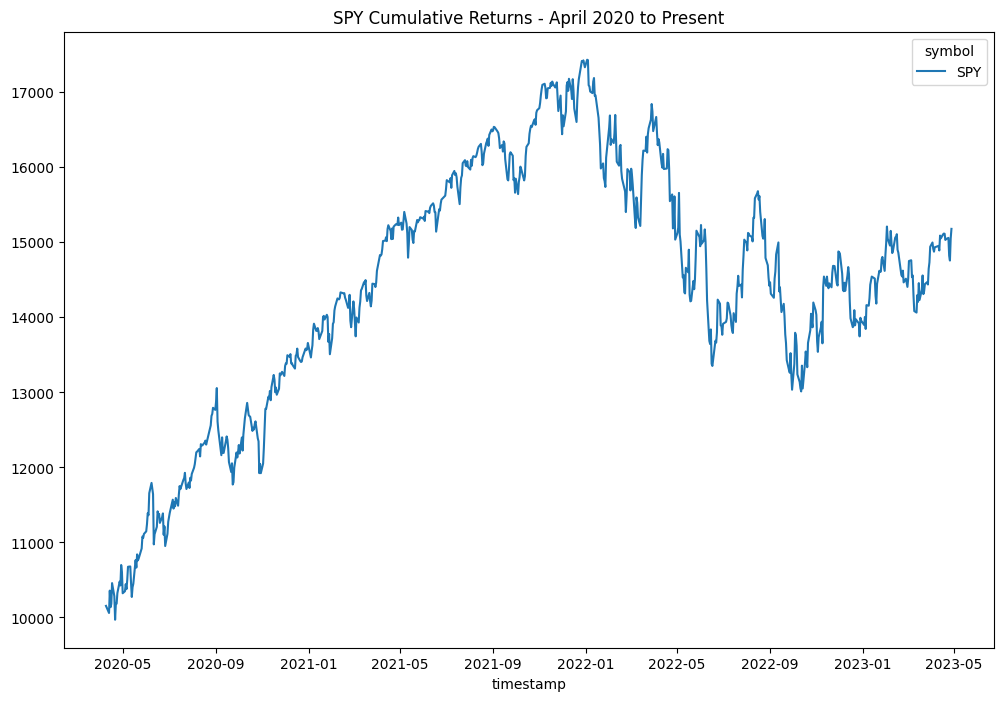

In [54]:
# Plot performance and save to Images
spy_profit.plot(figsize=(12,8), legend=True, title="SPY Cumulative Returns - April 2020 to Present");
plt.savefig("Images/SPYCumulativeReturns.png")

In [55]:
# Running cumulative return against initial investment to obtain current market value of investment in GLD
gld_profit = initial_investment * GLD_cumprod
gld_annotation = gld_profit.iloc[-1][0].round().astype(int)
gld_profit.head()

symbol               GLD
timestamp               
2020-04-09  10254.122211
2020-04-13  10437.116069
2020-04-14  10517.943744
2020-04-15  10475.266731
2020-04-16  10456.514711

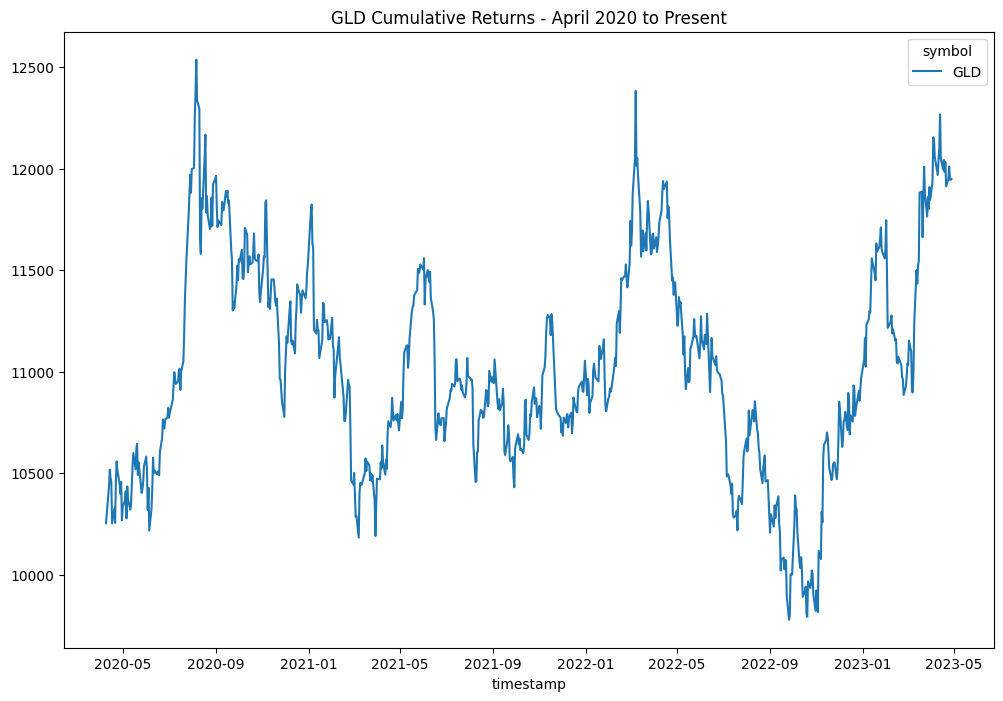

In [56]:
# Plot performance and save to Images
gld_profit.plot(figsize=(12,8), legend=True, title="GLD Cumulative Returns - April 2020 to Present");
plt.savefig("Images/GLDCumulativeReturns.png")

In [57]:
# Running cumulative return against initial investment to obtain current market value of investment in TLT
tlt_profit = initial_investment * TLT_cumprod
tlt_annotation = tlt_profit.iloc[-1][0].round().astype(int)
tlt_profit.head()

symbol               TLT
timestamp               
2020-04-09  10018.171906
2020-04-13   9926.706645
2020-04-14   9924.283724
2020-04-15  10187.170634
2020-04-16  10302.865104

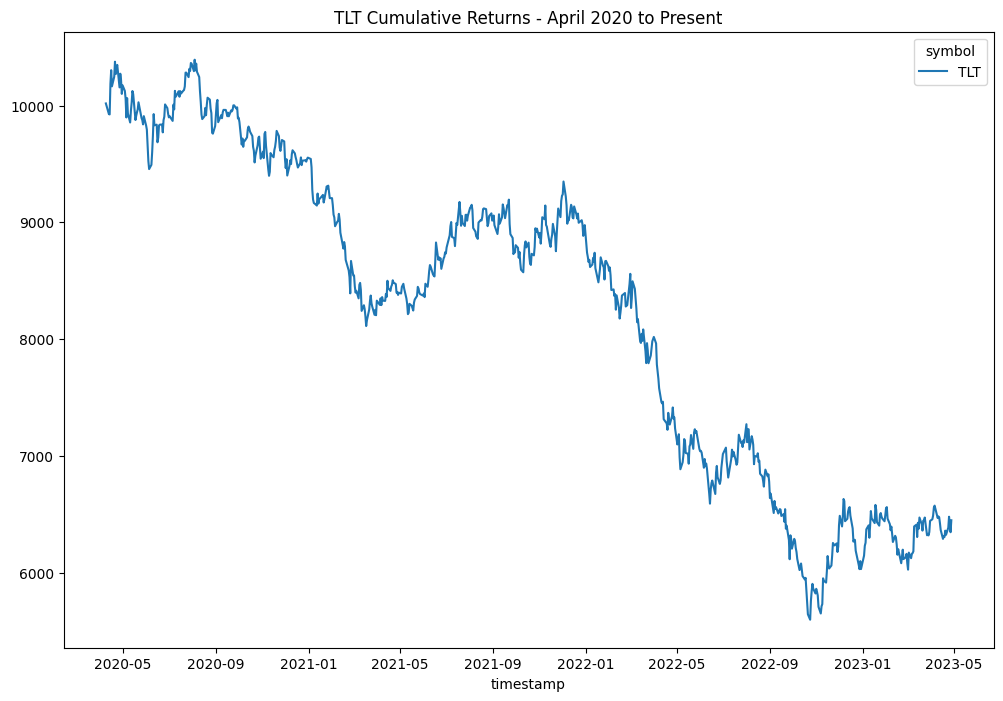

In [58]:
# Plot performance and save to Images
tlt_profit.plot(figsize=(12,8), legend=True, title="TLT Cumulative Returns - April 2020 to Present");
plt.savefig("Images/TLTCumulativeReturns.png")

In [59]:
# Creating date variables to use in plot
from datetime import date, timedelta
days_after_xlim = (date.today()+timedelta(days=88)).isoformat()

days_after_stocks = (date.today()+timedelta(days=2)).isoformat()

days_after_btc = (date.today()+timedelta(days=1)).isoformat()

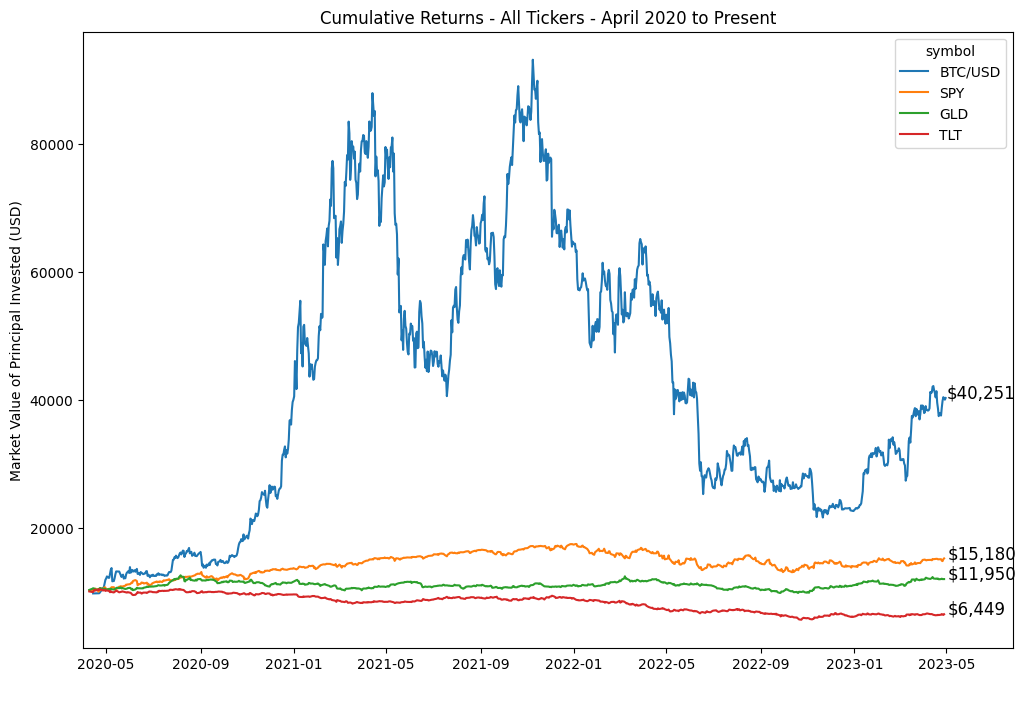

In [60]:
# Overlay of cumulative performances, $10k original investment
ax = btc_profit.plot(figsize=(12,8), legend=True, title="Cumulative Returns - All Tickers - April 2020 to Present")
spy_profit.plot(ax=ax, legend=True)
gld_profit.plot(ax=ax, legend=True)
tlt_profit.plot(ax=ax, legend=True)
ax.text(days_after_stocks, tlt_annotation, f"${tlt_annotation:,}", size=12)
ax.text(days_after_stocks, gld_annotation, f"${gld_annotation:,}", size=12)
ax.text(days_after_stocks, spy_annotation, f"${spy_annotation:,}", size=12)
ax.text(days_after_btc, btc_annotation, f"${btc_annotation:,}", size=12)
ax.set(ylabel='Market Value of Principal Invested (USD)',
       xlabel=' ')
ax.set_xlim('2020-04', days_after_xlim)
plt.savefig("Images/OverlayCumulativeReturns.png");

In [61]:
btc_profit.max()

symbol
BTC/USD    93136.450643
dtype: float64

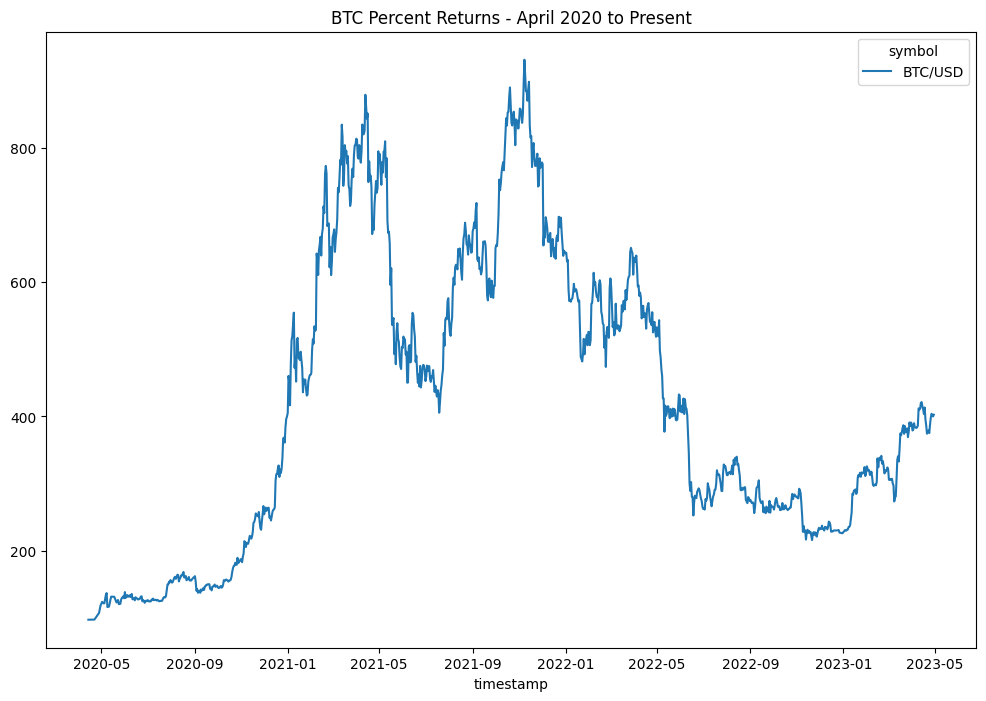

In [62]:
# Plot performance in percentage terms and save to Images
(BTC_cumprod*100).plot(figsize=(12,8), legend=True, title="BTC Percent Returns - April 2020 to Present");
plt.savefig("Images/BTCPercentReturns.png")

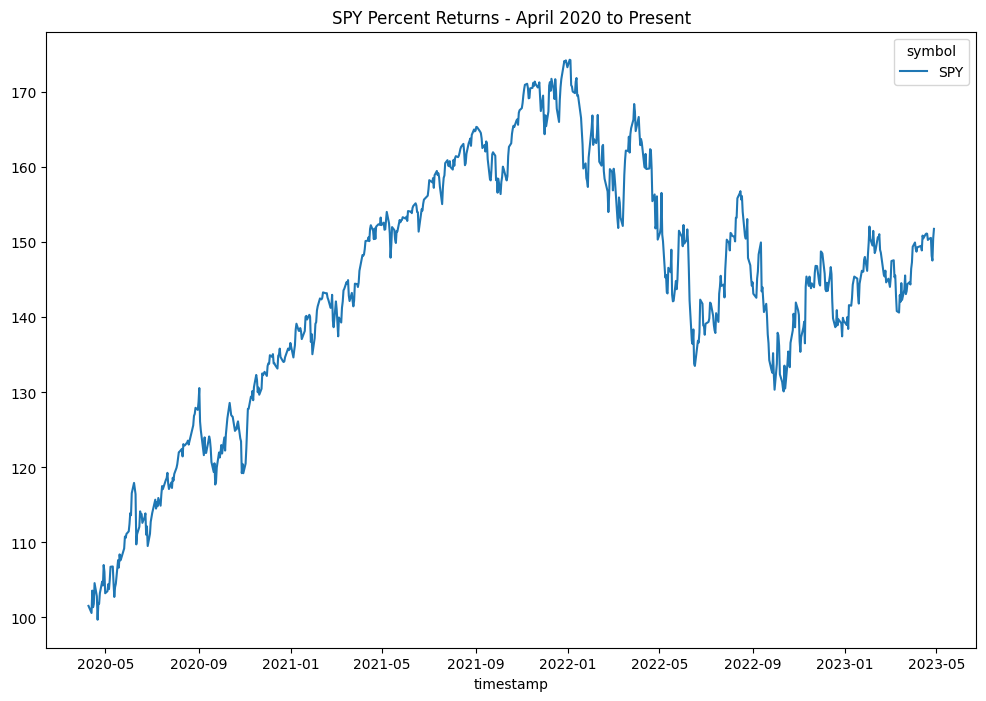

In [63]:
# Plot performance in percentage terms and save to Images
(SPY_cumprod*100).plot(figsize=(12,8), legend=True, title="SPY Percent Returns - April 2020 to Present");
plt.savefig("Images/SPYPercentReturns.png")

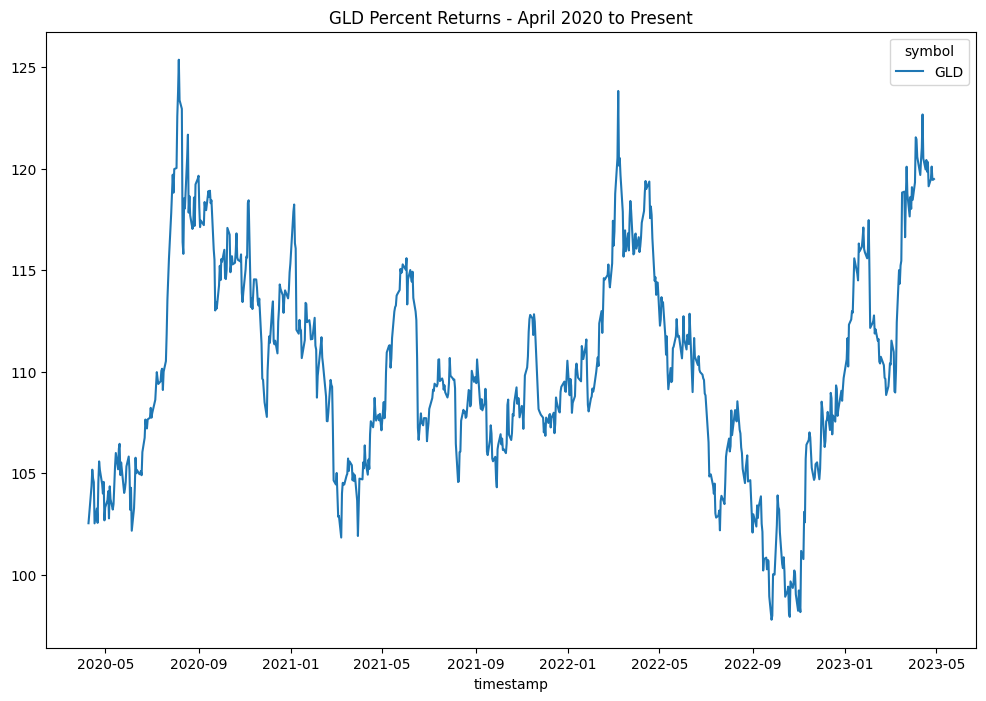

In [64]:
# Plot performance in percentage terms and save to Images
(GLD_cumprod*100).plot(figsize=(12,8), legend=True, title="GLD Percent Returns - April 2020 to Present");
plt.savefig("Images/GLDPercentReturns.png")

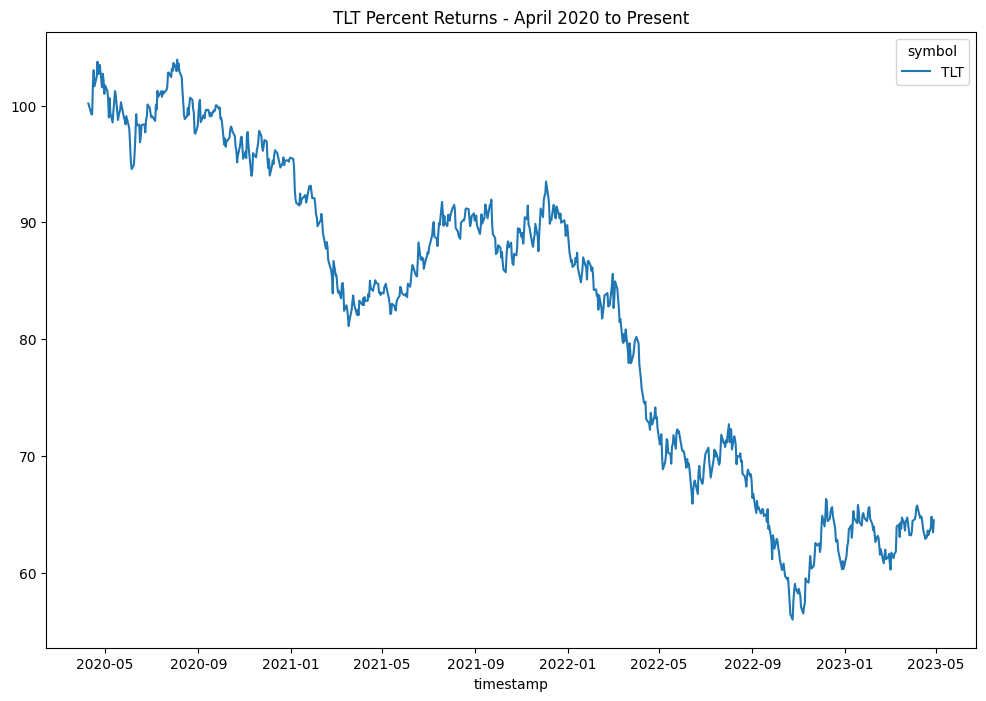

In [65]:
# Plot performance in percentage terms and save to Images
(TLT_cumprod*100).plot(figsize=(12,8), legend=True, title="TLT Percent Returns - April 2020 to Present");
plt.savefig("Images/TLTPercentReturns.png")

In [66]:
# Creating date variables to use in plot
from datetime import date, timedelta
days_after_xlim_pct = (date.today()+timedelta(days=70)).isoformat()

days_after_stocks_pct = (date.today()+timedelta(days=4)).isoformat()

days_after_btc_pct = (date.today()+timedelta(days=2)).isoformat()

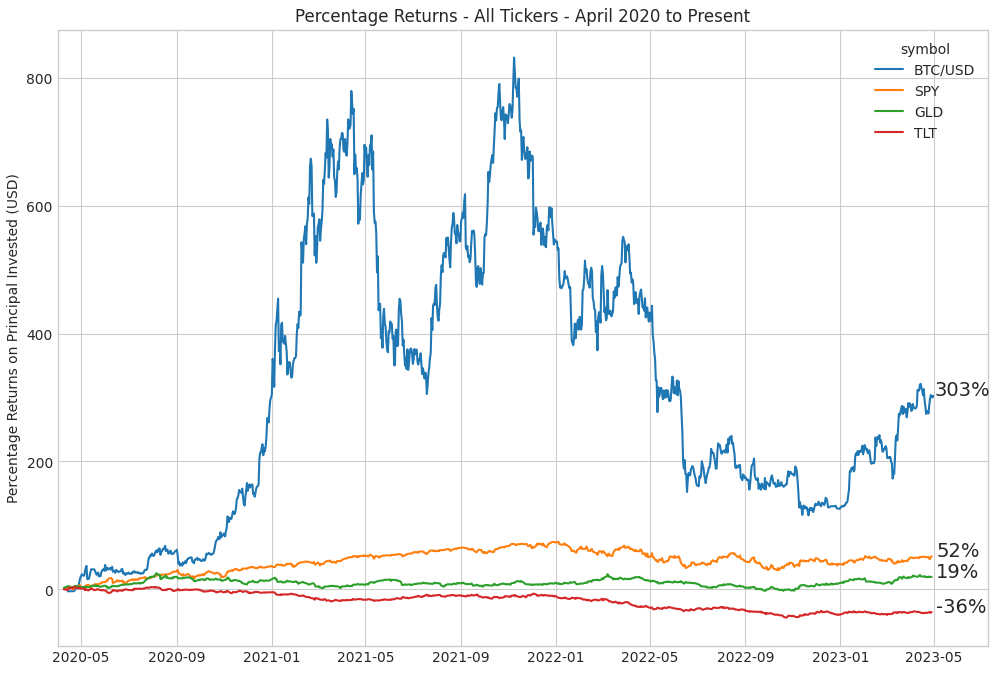

In [67]:
# Overlay of percentage returns 
with plt.style.context('seaborn-whitegrid'):
    ax = ((BTC_cumprod*100)-100).plot(figsize=(12,8), legend=True, title="Percentage Returns - All Tickers - April 2020 to Present")
    ((SPY_cumprod*100)-100).plot(ax=ax, legend=True)
    ((GLD_cumprod*100)-100).plot(ax=ax, legend=True)
    ((TLT_cumprod*100)-100).plot(ax=ax, legend=True)
    ax.text(days_after_stocks_pct, TLT_prod_annotation-100, f"{TLT_prod_annotation-100}%", size=14)
    ax.text(days_after_stocks_pct, GLD_prod_annotation-100, f"{GLD_prod_annotation-100}%", size=14)
    ax.text(days_after_stocks_pct, SPY_prod_annotation-100, f"{SPY_prod_annotation-100}%", size=14)
    ax.text(days_after_btc_pct, BTC_prod_annotation-100, f"{BTC_prod_annotation-100}%", size=14)
    ax.set(ylabel='Percentage Returns on Principal Invested (USD)',
           xlabel=' ')
    ax.set_xlim('2020-04', days_after_xlim_pct)
#     plt.legend(loc=(.93,.8625))
    plt.savefig("Images/OverlayPercentageReturns.png");

In [68]:
# Rechecking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1088 non-null   object 
 1   timestamp    1088 non-null   object 
 2   open         1088 non-null   float64
 3   high         1088 non-null   float64
 4   low          1088 non-null   float64
 5   close        1088 non-null   float64
 6   volume       1088 non-null   float64
 7   trade_count  1088 non-null   float64
 8   vwap         1088 non-null   float64
dtypes: float64(7), object(2)
memory usage: 76.6+ KB


In [69]:
# Shifting timestamp back to datetime to filter on month start dates
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'])
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       1088 non-null   object        
 1   timestamp    1088 non-null   datetime64[ns]
 2   open         1088 non-null   float64       
 3   high         1088 non-null   float64       
 4   low          1088 non-null   float64       
 5   close        1088 non-null   float64       
 6   volume       1088 non-null   float64       
 7   trade_count  1088 non-null   float64       
 8   vwap         1088 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 76.6+ KB


In [70]:
# Filtering for month start dates
btc_monthly = btc_df[btc_df['timestamp'].dt.is_month_start] 
btc_monthly.head()

symbol  timestamp     open     high      low    close  volume  \
5    BTC/USD 2020-05-01   8826.5   8834.0   8716.0   8816.5  0.3007   
29   BTC/USD 2020-06-01   9568.5  10393.0   9515.0  10106.5  5.9507   
59   BTC/USD 2020-07-01   9129.5   9270.0   9129.5   9240.5  5.4679   
90   BTC/USD 2020-08-01  11619.5  12035.0  10594.5  11221.5  0.6674   
116  BTC/USD 2020-09-01  11805.5  12005.5  11805.5  11847.5  0.4049   

     trade_count          vwap  
5            4.0   8830.673595  
29          34.0   9979.759012  
59          59.0   9230.826688  
90          24.0  11656.094171  
116          9.0  11947.180168

In [71]:
# Grabbing subset of timestamp and closing prices 
btc_subset = btc_monthly[['timestamp', 'close']]
btc_subset.head()

timestamp    close
5   2020-05-01   8816.5
29  2020-06-01  10106.5
59  2020-07-01   9240.5
90  2020-08-01  11221.5
116 2020-09-01  11847.5

In [72]:
# Resetting index
btc_reset = btc_subset.reset_index(drop=True)
btc_reset.head()

timestamp    close
0 2020-05-01   8816.5
1 2020-06-01  10106.5
2 2020-07-01   9240.5
3 2020-08-01  11221.5
4 2020-09-01  11847.5

In [73]:
# Setting timestamp column to index to prep for pct_change
btc_index = btc_reset.set_index('timestamp')
btc_index.head()

close
timestamp          
2020-05-01   8816.5
2020-06-01  10106.5
2020-07-01   9240.5
2020-08-01  11221.5
2020-09-01  11847.5

In [74]:
# Calculating month over month pct change
btc_chg = btc_index.pct_change()
btc_chg.head()

close
timestamp           
2020-05-01       NaN
2020-06-01  0.146317
2020-07-01 -0.085687
2020-08-01  0.214382
2020-09-01  0.055786

In [75]:
# Rechecking info
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2020-05-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   35 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [76]:
# Convert index back to string to prep for plotting
btc_chg.index = btc_chg.index.strftime("%Y-%m-%d")
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2020-05-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   35 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


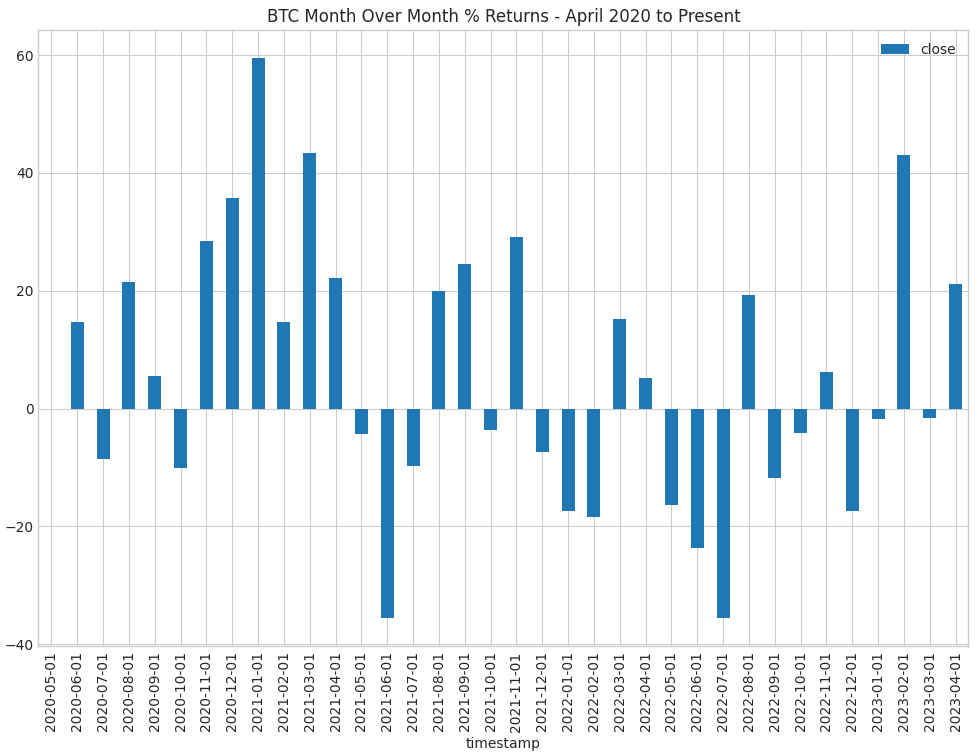

In [77]:
# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (btc_chg*100).plot(kind='bar', figsize=(12,8), legend=True, title="BTC Month Over Month % Returns - April 2020 to Present");
    plt.savefig("Images/BTCMonthlyPercentReturns.png")

In [78]:
# Prep SPY dataframe
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       2310 non-null   object 
 1   timestamp    2310 non-null   object 
 2   open         2310 non-null   float64
 3   high         2310 non-null   float64
 4   low          2310 non-null   float64
 5   close        2310 non-null   float64
 6   volume       2310 non-null   float64
 7   trade_count  2310 non-null   float64
 8   vwap         2310 non-null   float64
dtypes: float64(7), object(2)
memory usage: 162.5+ KB


In [79]:
# Shifting timestamp back to datetime to filter on month start dates
stock_df['timestamp'] = pd.to_datetime(stock_df['timestamp'])
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       2310 non-null   object        
 1   timestamp    2310 non-null   datetime64[ns]
 2   open         2310 non-null   float64       
 3   high         2310 non-null   float64       
 4   low          2310 non-null   float64       
 5   close        2310 non-null   float64       
 6   volume       2310 non-null   float64       
 7   trade_count  2310 non-null   float64       
 8   vwap         2310 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 162.5+ KB


In [80]:
stock_df

symbol  timestamp    open      high       low   close      volume  \
0       GLD 2020-04-08  155.91  155.9400  154.5900  154.65   7600804.0   
1       GLD 2020-04-09  158.08  159.0800  157.2100  158.58  18123039.0   
2       GLD 2020-04-13  159.17  162.3800  158.6250  161.41  20549213.0   
3       GLD 2020-04-14  162.73  164.4200  161.7800  162.66  17095086.0   
4       GLD 2020-04-15  161.80  162.5400  160.8061  162.00  12141890.0   
...     ...        ...     ...       ...       ...     ...         ...   
2305    TLT 2023-04-24  104.96  105.4875  104.8400  105.41  17035762.0   
2306    TLT 2023-04-25  106.33  107.1300  106.2800  106.96  21908546.0   
2307    TLT 2023-04-26  106.79  107.2400  105.6700  105.82  19615333.0   
2308    TLT 2023-04-27  105.20  105.2700  104.6100  104.77  20247619.0   
2309    TLT 2023-04-28  106.21  106.7600  105.8600  106.46  23824193.0   

      trade_count        vwap  
0         60704.0  155.233884  
1        140239.0  158.255634  
2        140401.0  160.906373  
3        146336.0  163.197557  
4         95518.0  161.749049  
...           ...         ...  
2305      83376.0  105.290770  
2306     141017.0  106.836469  
2307     117843.0  106.235620  
2308     108852.0  104.854365  
2309     128162.0  106.340339  

[2310 rows x 9 columns]

In [81]:
stock_index = stock_df.set_index('timestamp')
stock_index

symbol    open      high       low   close      volume  \
timestamp                                                           
2020-04-08    GLD  155.91  155.9400  154.5900  154.65   7600804.0   
2020-04-09    GLD  158.08  159.0800  157.2100  158.58  18123039.0   
2020-04-13    GLD  159.17  162.3800  158.6250  161.41  20549213.0   
2020-04-14    GLD  162.73  164.4200  161.7800  162.66  17095086.0   
2020-04-15    GLD  161.80  162.5400  160.8061  162.00  12141890.0   
...           ...     ...       ...       ...     ...         ...   
2023-04-24    TLT  104.96  105.4875  104.8400  105.41  17035762.0   
2023-04-25    TLT  106.33  107.1300  106.2800  106.96  21908546.0   
2023-04-26    TLT  106.79  107.2400  105.6700  105.82  19615333.0   
2023-04-27    TLT  105.20  105.2700  104.6100  104.77  20247619.0   
2023-04-28    TLT  106.21  106.7600  105.8600  106.46  23824193.0   

            trade_count        vwap  
timestamp                            
2020-04-08      60704.0  155.233884  
2020-04-09     140239.0  158.255634  
2020-04-13     140401.0  160.906373  
2020-04-14     146336.0  163.197557  
2020-04-15      95518.0  161.749049  
...                 ...         ...  
2023-04-24      83376.0  105.290770  
2023-04-25     141017.0  106.836469  
2023-04-26     117843.0  106.235620  
2023-04-27     108852.0  104.854365  
2023-04-28     128162.0  106.340339  

[2310 rows x 8 columns]

In [82]:
stock_index['2021-06-30':'2021-07-02']

symbol    open     high       low   close      volume  trade_count  \
timestamp                                                                       
2021-06-30    GLD  164.57  166.100  164.2900  165.63   7954916.0      55215.0   
2021-07-01    GLD  166.65  166.880  165.5000  166.20   7427387.0      50788.0   
2021-07-02    GLD  167.35  167.715  166.4000  167.29   7872766.0      52311.0   
2021-06-30    SPY  427.21  428.780  427.1800  428.06  64702769.0     315392.0   
2021-07-01    SPY  428.87  430.600  428.8000  430.43  52968992.0     315119.0   
2021-07-02    SPY  431.67  434.100  430.5218  433.72  57503965.0     312260.0   
2021-06-30    TLT  144.25  144.930  144.0700  144.35  15707427.0      76777.0   
2021-07-01    TLT  143.98  144.310  143.5300  144.17  10767196.0      55429.0   
2021-07-02    TLT  144.23  145.040  144.1100  145.04   9648629.0      52006.0   

                  vwap  
timestamp               
2021-06-30  165.379047  
2021-07-01  166.141960  
2021-07-02  167.181069  
2021-06-30  428.035998  
2021-07-01  429.721484  
2021-07-02  432.842859  
2021-06-30  144.486788  
2021-07-01  143.845345  
2021-07-02  144.737576

In [83]:
# Grouping GLD by business month start; nth isolates by symbol
gld_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(0)
gld_group_df.head()

symbol      open    high     low   close      volume  trade_count  \
timestamp                                                                      
2020-04-01    GLD  155.9100  155.94  154.59  154.65   7600804.0      60704.0   
2020-05-01    GLD  157.9500  160.45  157.80  159.78  10914334.0      87024.0   
2020-06-01    GLD  162.9235  163.74  162.39  163.66   8155048.0      60202.0   
2020-07-01    GLD  167.0500  167.06  165.34  166.62  13214759.0      86821.0   
2020-08-03    GLD  185.0500  185.82  184.20  185.64  12896999.0      93696.0   

                  vwap  
timestamp               
2020-04-01  155.233884  
2020-05-01  159.380639  
2020-06-01  163.323352  
2020-07-01  166.229189  
2020-08-03  185.228945

In [84]:
# Filtering first and last months due to incomplete data
gld_iloc = gld_group_df.iloc[1:-1]
gld_iloc.head()

symbol      open    high     low   close      volume  trade_count  \
timestamp                                                                      
2020-05-01    GLD  157.9500  160.45  157.80  159.78  10914334.0      87024.0   
2020-06-01    GLD  162.9235  163.74  162.39  163.66   8155048.0      60202.0   
2020-07-01    GLD  167.0500  167.06  165.34  166.62  13214759.0      86821.0   
2020-08-03    GLD  185.0500  185.82  184.20  185.64  12896999.0      93696.0   
2020-09-01    GLD  186.9900  186.99  184.33  185.05  10689058.0      75982.0   

                  vwap  
timestamp               
2020-05-01  159.380639  
2020-06-01  163.323352  
2020-07-01  166.229189  
2020-08-03  185.228945  
2020-09-01  185.384520

In [85]:
# Grouping SPY by business month start; nth isolates by symbol
spy_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(1)
spy_group_df.head()

symbol    open      high       low   close       volume  \
timestamp                                                            
2020-04-01    SPY  267.96  276.0000  265.2542  274.00  153774487.0   
2020-05-01    SPY  285.31  290.6572  281.5200  282.83  125180028.0   
2020-06-01    SPY  303.62  306.2050  303.0600  305.45   56679836.0   
2020-07-01    SPY  309.54  311.8900  309.0700  310.57   72474858.0   
2020-08-03    SPY  328.32  329.6200  327.7300  328.67   53078112.0   

            trade_count        vwap  
timestamp                            
2020-04-01     950859.0  271.051454  
2020-05-01     639987.0  284.092832  
2020-06-01     316834.0  305.036356  
2020-07-01     418495.0  310.486119  
2020-08-03     288003.0  328.658795

In [86]:
# Filtering first and last months due to incomplete data
spy_iloc = spy_group_df.iloc[1:-1]
spy_iloc.head()

symbol    open      high     low   close       volume  trade_count  \
timestamp                                                                       
2020-05-01    SPY  285.31  290.6572  281.52  282.83  125180028.0     639987.0   
2020-06-01    SPY  303.62  306.2050  303.06  305.45   56679836.0     316834.0   
2020-07-01    SPY  309.54  311.8900  309.07  310.57   72474858.0     418495.0   
2020-08-03    SPY  328.32  329.6200  327.73  328.67   53078112.0     288003.0   
2020-09-01    SPY  350.21  352.7100  349.24  352.68   54999325.0     295183.0   

                  vwap  
timestamp               
2020-05-01  284.092832  
2020-06-01  305.036356  
2020-07-01  310.486119  
2020-08-03  328.658795  
2020-09-01  351.086724

In [87]:
# Grouping TLT by business month start; nth isolates by symbol
tlt_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(2)
tlt_group_df.head()

symbol    open    high     low   close      volume  trade_count  \
timestamp                                                                    
2020-04-01    TLT  165.11  166.19  164.13  165.09  10147077.0      63686.0   
2020-05-01    TLT  167.50  168.11  166.44  167.95  10209421.0      52918.0   
2020-06-01    TLT  162.10  162.44  161.67  162.28  13353301.0      54793.0   
2020-07-01    TLT  162.81  163.56  162.15  163.42  13181262.0      66576.0   
2020-08-03    TLT  169.24  169.99  168.97  169.95   9067756.0      61181.0   

                  vwap  
timestamp               
2020-04-01  165.217491  
2020-05-01  167.362331  
2020-06-01  162.363115  
2020-07-01  163.014043  
2020-08-03  169.514329

In [88]:
# Filtering first and last months due to incomplete data
tlt_iloc = tlt_group_df.iloc[1:-1]
tlt_iloc.head()

symbol    open    high     low   close      volume  trade_count  \
timestamp                                                                    
2020-05-01    TLT  167.50  168.11  166.44  167.95  10209421.0      52918.0   
2020-06-01    TLT  162.10  162.44  161.67  162.28  13353301.0      54793.0   
2020-07-01    TLT  162.81  163.56  162.15  163.42  13181262.0      66576.0   
2020-08-03    TLT  169.24  169.99  168.97  169.95   9067756.0      61181.0   
2020-09-01    TLT  161.76  164.07  161.18  163.86  10587634.0      58232.0   

                  vwap  
timestamp               
2020-05-01  167.362331  
2020-06-01  162.363115  
2020-07-01  163.014043  
2020-08-03  169.514329  
2020-09-01  163.138871

In [89]:
# Revising column names to prep for join
dict = {'close':'tlt_close'}

tlt_iloc = tlt_iloc.rename(columns=dict)


spy_dict = {'close':'spy_close'}

spy_iloc = spy_iloc.rename(columns=spy_dict)


gld_dict = {'close':'gld_close'}

gld_iloc = gld_iloc.rename(columns=gld_dict)
gld_iloc



symbol      open      high       low  gld_close      volume  \
timestamp                                                                
2020-05-01    GLD  157.9500  160.4500  157.8000     159.78  10914334.0   
2020-06-01    GLD  162.9235  163.7400  162.3900     163.66   8155048.0   
2020-07-01    GLD  167.0500  167.0600  165.3400     166.62  13214759.0   
2020-08-03    GLD  185.0500  185.8200  184.2000     185.64  12896999.0   
2020-09-01    GLD  186.9900  186.9900  184.3300     185.05  10689058.0   
2020-10-01    GLD  178.7100  179.5000  178.0375     178.70  10380333.0   
2020-11-02    GLD  177.4499  177.9250  177.1301     177.91   6498368.0   
2020-12-01    GLD  169.7600  170.4800  169.3000     170.19  13555209.0   
2021-01-01    GLD  181.9700  182.4000  180.9550     182.32  14308436.0   
2021-02-01    GLD  175.0200  175.2600  174.0600     174.23   9235082.0   
2021-03-01    GLD  163.0300  163.3500  161.1600     161.53  13828347.0   
2021-04-01    GLD  161.5600  162.1100  161.2800     161.98   7104695.0   
2021-05-03    GLD  167.6100  168.4300  167.4100     167.81   9013396.0   
2021-06-01    GLD  178.7600  178.8500  177.1900     177.90   9143250.0   
2021-07-01    GLD  166.6500  166.8800  165.5000     166.20   7427387.0   
2021-08-02    GLD  169.3300  170.2450  169.1000     169.61  10766410.0   
2021-09-01    GLD  169.9400  170.0000  169.1600     169.70   4752563.0   
2021-10-01    GLD  164.2700  164.9600  163.8850     164.59   6649876.0   
2021-11-01    GLD  167.3800  167.8400  166.9100     167.52   4969004.0   
2021-12-01    GLD  166.8400  167.4700  166.0600     166.16   7820795.0   
2022-01-03    GLD  168.8600  169.0100  168.0000     168.33   9014203.0   
2022-02-01    GLD  168.5700  168.8500  167.8700     168.23   9756471.0   
2022-03-01    GLD  179.0456  181.7600  179.0300     181.62  21859243.0   
2022-04-01    GLD  179.5501  180.4599  178.9800     179.50  13027125.0   
2022-05-02    GLD  173.6121  174.6500  172.9850     173.63  14237636.0   
2022-06-01    GLD  172.2099  172.5300  171.3900     172.23   6938929.0   
2022-07-01    GLD  167.1300  168.6800  166.9600     168.32  11377331.0   
2022-08-01    GLD  164.9800  165.4100  164.4100     165.03   4660218.0   
2022-09-01    GLD  158.1700  158.3900  157.3200     157.87   7384400.0   
2022-10-03    GLD  155.4380  158.4800  155.2300     158.43  10348997.0   
2022-11-01    GLD  153.8200  153.9800  152.8700     153.46   4599737.0   
2022-12-01    GLD  167.4800  167.9500  166.9750     167.84   8232886.0   
2023-01-02    GLD  171.3200  172.0900  170.0200     171.06   7979721.0   
2023-02-01    GLD  179.7500  181.7300  178.6300     181.67   7996342.0   
2023-03-01    GLD  170.9500  171.4900  170.4700     170.76   6590684.0   

            trade_count        vwap  
timestamp                            
2020-05-01      87024.0  159.380639  
2020-06-01      60202.0  163.323352  
2020-07-01      86821.0  166.229189  
2020-08-03      93696.0  185.228945  
2020-09-01      75982.0  185.384520  
2020-10-01      65577.0  178.903733  
2020-11-02      55161.0  177.626697  
2020-12-01      87946.0  169.921532  
2021-01-01     102693.0  181.929522  
2021-02-01      66775.0  174.612395  
2021-03-01     102912.0  162.159329  
2021-04-01      52967.0  161.759341  
2021-05-03      67434.0  167.845715  
2021-06-01      67595.0  178.022479  
2021-07-01      50788.0  166.141960  
2021-08-02      60007.0  169.726678  
2021-09-01      37218.0  169.625454  
2021-10-01      55418.0  164.438331  
2021-11-01      42298.0  167.485529  
2021-12-01      62574.0  166.605337  
2022-01-03      67681.0  168.403580  
2022-02-01      70364.0  168.335275  
2022-03-01     162731.0  180.521167  
2022-04-01      77799.0  179.714366  
2022-05-02     108493.0  173.798444  
2022-06-01      39584.0  172.031163  
2022-07-01      71249.0  167.938735  
2022-08-01      33304.0  164.970363  
2022-09-01      56371.0  157.944854  
2022-10-03      69080.0  157.230698  
2022-11-01      39133.0  153.392860  
2022-12-01      59

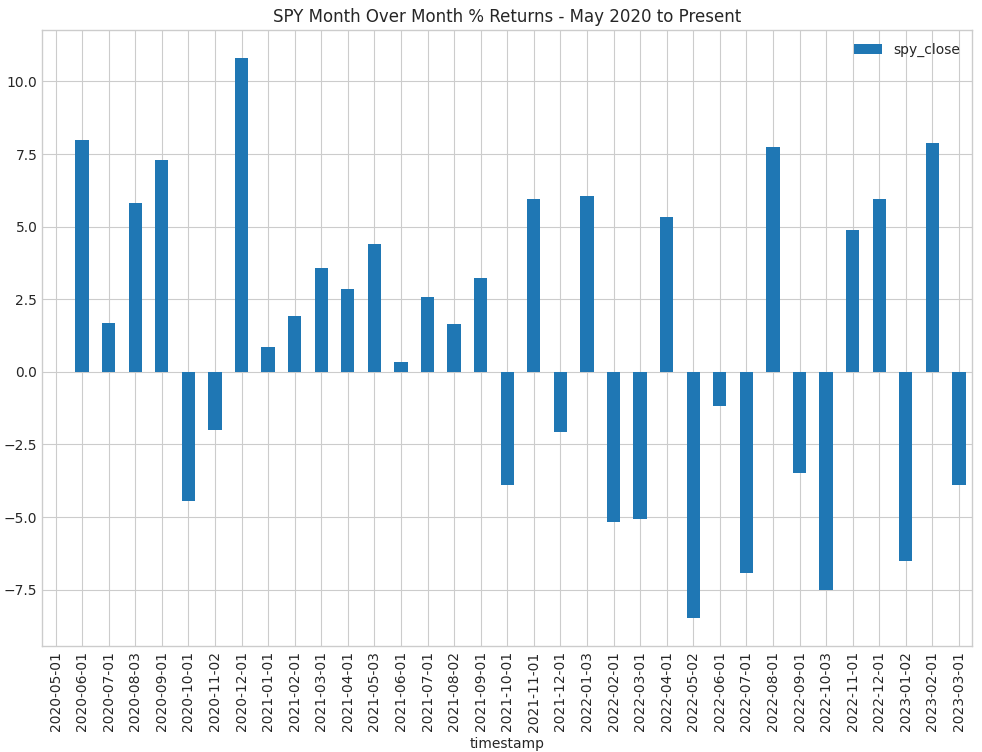

In [90]:
# Grabbing subset of SPY timestamp and closing prices 
spy_close = spy_iloc['spy_close']
spy_close

# Calculating pct change
spy_pct = spy_close.pct_change()

# Convert index back to string to prep for plotting
spy_pct.index = spy_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (spy_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="SPY Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/SPYMonthlyPercentReturns.png")

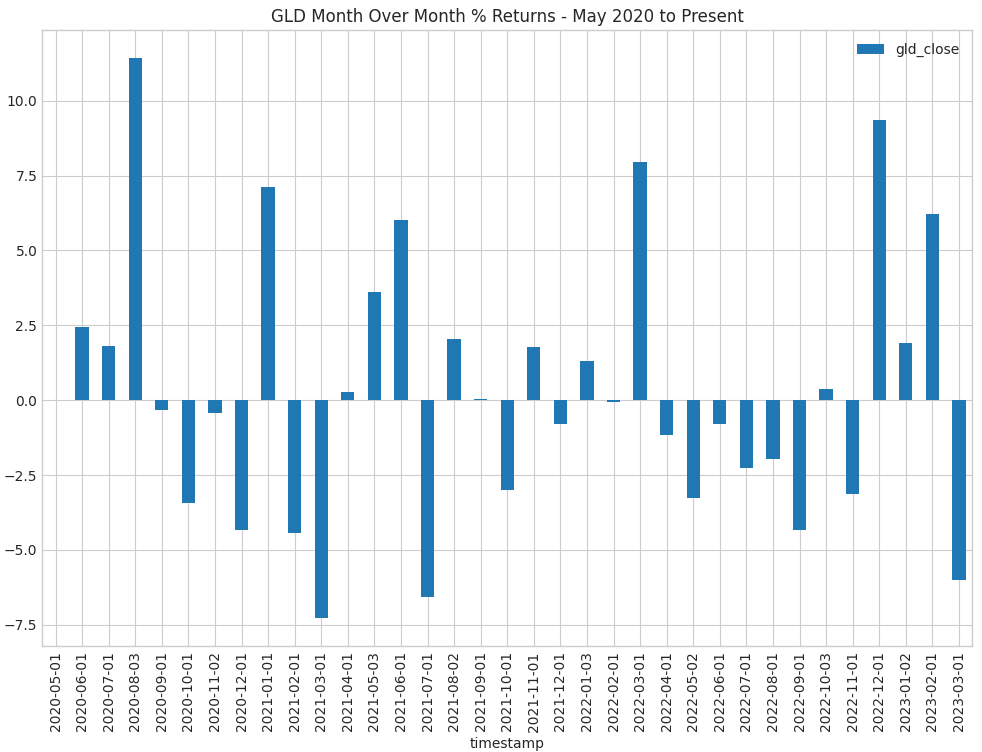

In [91]:
# Grabbing subset of GLD timestamp and closing prices 
gld_close = gld_iloc['gld_close']

# Calculating pct change
gld_pct = gld_close.pct_change()

# Convert index back to string to prep for plotting
gld_pct.index = gld_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (gld_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="GLD Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/GLDMonthlyPercentReturns.png")

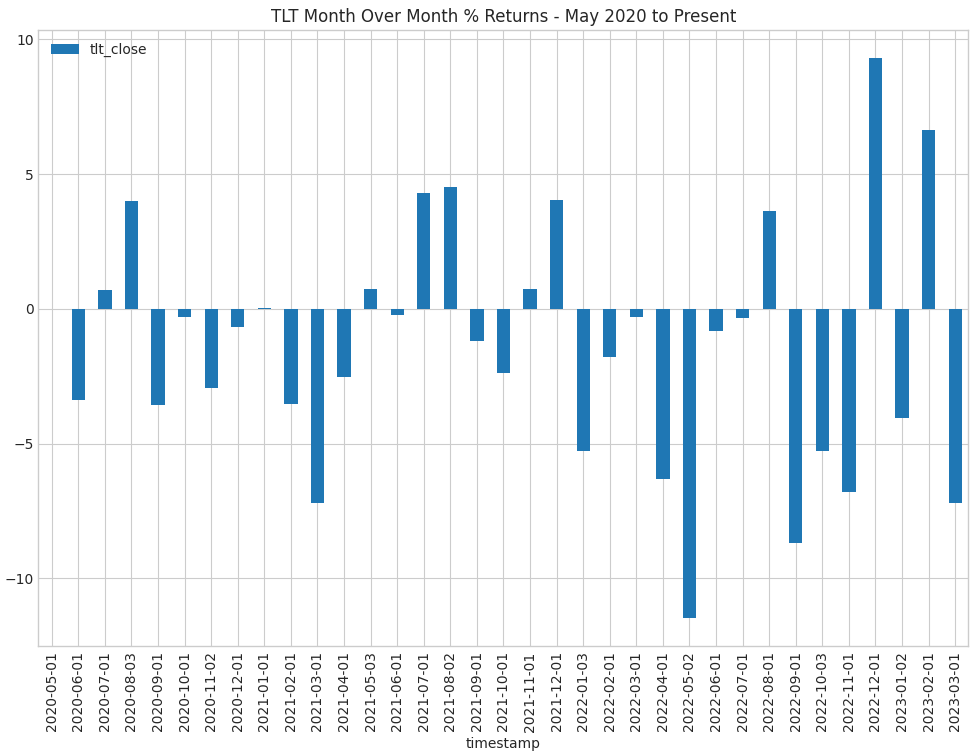

In [92]:
# Grabbing subset of TLT timestamp and closing prices 
tlt_close = tlt_iloc['tlt_close']

# Calculating pct change
tlt_pct = tlt_close.pct_change()

# Convert index back to string to prep for plotting
tlt_pct.index = tlt_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (tlt_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="TLT Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/TLTMonthlyPercentReturns.png")

In [93]:
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2020-05-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   35 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


In [94]:
tlt_pct.info()

<class 'pandas.core.series.Series'>
Index: 35 entries, 2020-05-01 to 2023-03-01
Series name: tlt_close
Non-Null Count  Dtype  
--------------  -----  
34 non-null     float64
dtypes: float64(1)
memory usage: 560.0+ bytes


In [95]:
spy_pct.shape

(35,)

In [96]:
gld_pct.shape

(35,)

In [97]:
df_concat = pd.concat([tlt_pct, spy_pct, gld_pct], axis=1)
df_concat

tlt_close  spy_close  gld_close
timestamp                                  
2020-05-01        NaN        NaN        NaN
2020-06-01  -0.033760   0.079977   0.024283
2020-07-01   0.007025   0.016762   0.018086
2020-08-03   0.039958   0.058280   0.114152
2020-09-01  -0.035834   0.073052  -0.003178
2020-10-01  -0.003051  -0.044545  -0.034315
2020-11-02  -0.029261  -0.020120  -0.004421
2020-12-01  -0.006810   0.107968  -0.043393
2021-01-01   0.000254   0.008556   0.071273
2021-02-01  -0.035166   0.019107  -0.044373
2021-03-01  -0.071974   0.035663  -0.072892
2021-04-01  -0.025167   0.028709   0.002786
2021-05-03   0.007345   0.043908   0.035992
2021-06-01  -0.002238   0.003515   0.060128
2021-07-01   0.043123   0.025639  -0.065767
2021-08-02   0.045086   0.016635   0.020517
2021-09-01  -0.011814   0.032473   0.000531
2021-10-01  -0.023776  -0.038867  -0.030112
2021-11-01   0.007499   0.059414   0.017802
2021-12-01   0.040290  -0.020737  -0.008118
2022-01-03  -0.052777   0.060400   0.013060
2022-02-01  -0.017879  -0.051831  -0.000594
2022-03-01  -0.002964  -0.050712   0.079593
2022-04-01  -0.063128   0.053351  -0.011673
2022-05-02  -0.114821  -0.084872  -0.032702
2022-06-01  -0.008193  -0.011798  -0.008063
2022-07-01  -0.003442  -0.069216  -0.022702
2022-08-01   0.036436   0.077458  -0.019546
2022-09-01  -0.086971  -0.034934  -0.043386
2022-10-03  -0.052646  -0.075198   0.003547
2022-11-01  -0.067996   0.048853  -0.031370
2022-12-01   0.092901   0.059451   0.093705
2023-01-02  -0.040658  -0.065197   0.019185
2023-02-01   0.066233   0.078725   0.062025
2023-03-01  -0.072194  -0.039094  -0.060054

In [98]:
btc_chg.shape

(36, 1)

In [99]:
btc_re = btc_chg.iloc[0:-1]
btc_re

close
timestamp           
2020-05-01       NaN
2020-06-01  0.146317
2020-07-01 -0.085687
2020-08-01  0.214382
2020-09-01  0.055786
2020-10-01 -0.100696
2020-11-01  0.284715
2020-12-01  0.357868
2021-01-01  0.594222
2021-02-01  0.147177
2021-03-01  0.434132
2021-04-01  0.220784
2021-05-01 -0.042849
2021-06-01 -0.355676
2021-07-01 -0.098060
2021-08-01  0.199408
2021-09-01  0.244711
2021-10-01 -0.037009
2021-11-01  0.291715
2021-12-01 -0.073966
2022-01-01 -0.173802
2022-02-01 -0.183169
2022-03-01  0.152741
2022-04-01  0.051325
2022-05-01 -0.163191
2022-06-01 -0.235826
2022-07-01 -0.355927
2022-08-01  0.192689
2022-09-01 -0.118534
2022-10-01 -0.041121
2022-11-01  0.061301
2022-12-01 -0.174473
2023-01-01 -0.017344
2023-02-01  0.430958
2023-03-01 -0.015211

In [100]:
all_concat = pd.concat([df_concat, btc_re], axis=1)
all_concat

tlt_close  spy_close  gld_close     close
timestamp                                            
2020-05-01        NaN        NaN        NaN       NaN
2020-06-01  -0.033760   0.079977   0.024283  0.146317
2020-07-01   0.007025   0.016762   0.018086 -0.085687
2020-08-03   0.039958   0.058280   0.114152       NaN
2020-09-01  -0.035834   0.073052  -0.003178  0.055786
2020-10-01  -0.003051  -0.044545  -0.034315 -0.100696
2020-11-02  -0.029261  -0.020120  -0.004421       NaN
2020-12-01  -0.006810   0.107968  -0.043393  0.357868
2021-01-01   0.000254   0.008556   0.071273  0.594222
2021-02-01  -0.035166   0.019107  -0.044373  0.147177
2021-03-01  -0.071974   0.035663  -0.072892  0.434132
2021-04-01  -0.025167   0.028709   0.002786  0.220784
2021-05-03   0.007345   0.043908   0.035992       NaN
2021-06-01  -0.002238   0.003515   0.060128 -0.355676
2021-07-01   0.043123   0.025639  -0.065767 -0.098060
2021-08-02   0.045086   0.016635   0.020517       NaN
2021-09-01  -0.011814   0.032473   0.000531  0.244711
2021-10-01  -0.023776  -0.038867  -0.030112 -0.037009
2021-11-01   0.007499   0.059414   0.017802  0.291715
2021-12-01   0.040290  -0.020737  -0.008118 -0.073966
2022-01-03  -0.052777   0.060400   0.013060       NaN
2022-02-01  -0.017879  -0.051831  -0.000594 -0.183169
2022-03-01  -0.002964  -0.050712   0.079593  0.152741
2022-04-01  -0.063128   0.053351  -0.011673  0.051325
2022-05-02  -0.114821  -0.084872  -0.032702       NaN
2022-06-01  -0.008193  -0.011798  -0.008063 -0.235826
2022-07-01  -0.003442  -0.069216  -0.022702 -0.355927
2022-08-01   0.036436   0.077458  -0.019546  0.192689
2022-09-01  -0.086971  -0.034934  -0.043386 -0.118534
2022-10-03  -0.052646  -0.075198   0.003547       NaN
2022-11-01  -0.067996   0.048853  -0.031370  0.061301
2022-12-01   0.092901   0.059451   0.093705 -0.174473
2023-01-02  -0.040658  -0.065197   0.019185       NaN
2023-02-01   0.066233   0.078725   0.062025  0.430958
2023-03-01  -0.072194  -0.039094  -0.060054 -0.015211
2020-08-01        NaN        NaN        NaN  0.214382
2020-11-01        NaN        NaN        NaN  0.284715
2021-05-01        NaN        NaN        NaN -0.042849
2021-08-01        NaN        NaN        NaN  0.199408
2022-01-01        NaN        NaN        NaN -0.173802
2022-05-01        NaN        NaN        NaN -0.163191
2022-10-01        NaN        NaN        NaN -0.041121
2023-01-01        NaN        NaN        NaN -0.017344

In [101]:
# !pip install scipy

The correlation between both factors is 0.15


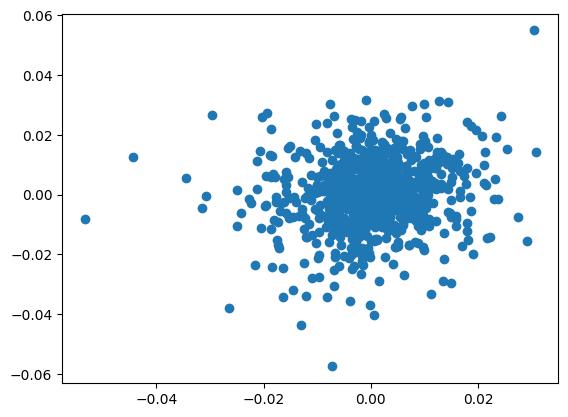

In [102]:
import scipy.stats as st
plt.scatter(gld_daily['GLD'], spy_daily['SPY'])
plt.show
correlation = st.pearsonr(gld_daily['GLD'], spy_daily['SPY'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [103]:
correlation

PearsonRResult(statistic=0.14712247604899836, pvalue=4.2125767831979626e-05)

The correlation between both factors is -0.07


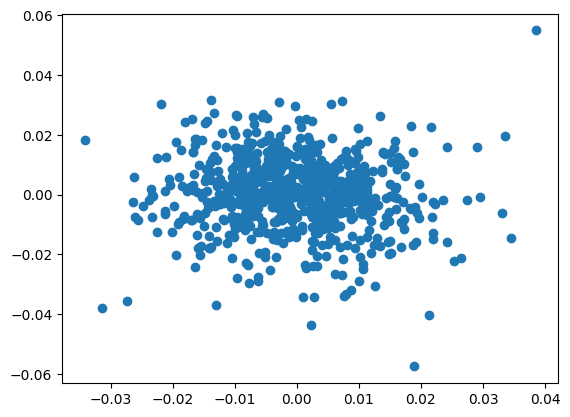

In [104]:
plt.scatter(tlt_daily['TLT'], spy_daily['SPY'])
plt.show
correlation_tlt = st.pearsonr(tlt_daily['TLT'], spy_daily['SPY'])
print(f"The correlation between both factors is {round(correlation_tlt[0],2)}")

In [105]:
correlation_tlt

PearsonRResult(statistic=-0.06856103051651619, pvalue=0.05738072636587223)

The correlation between both factors is 0.28


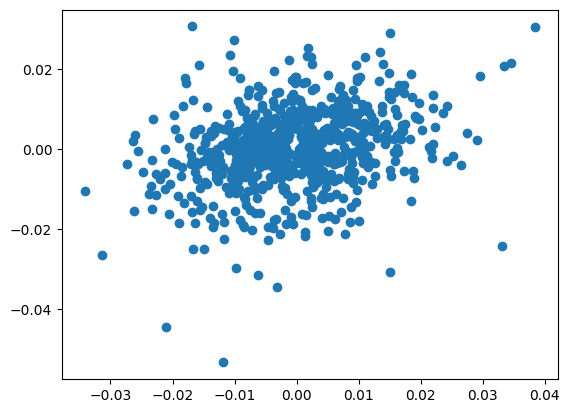

In [106]:
plt.scatter(tlt_daily['TLT'], gld_daily['GLD'])
plt.show
correlation_gld = st.pearsonr(tlt_daily['TLT'], gld_daily['GLD'])
print(f"The correlation between both factors is {round(correlation_gld[0],2)}")

In [107]:
correlation_gld

PearsonRResult(statistic=0.2833482392019539, pvalue=1.1525034068845424e-15)

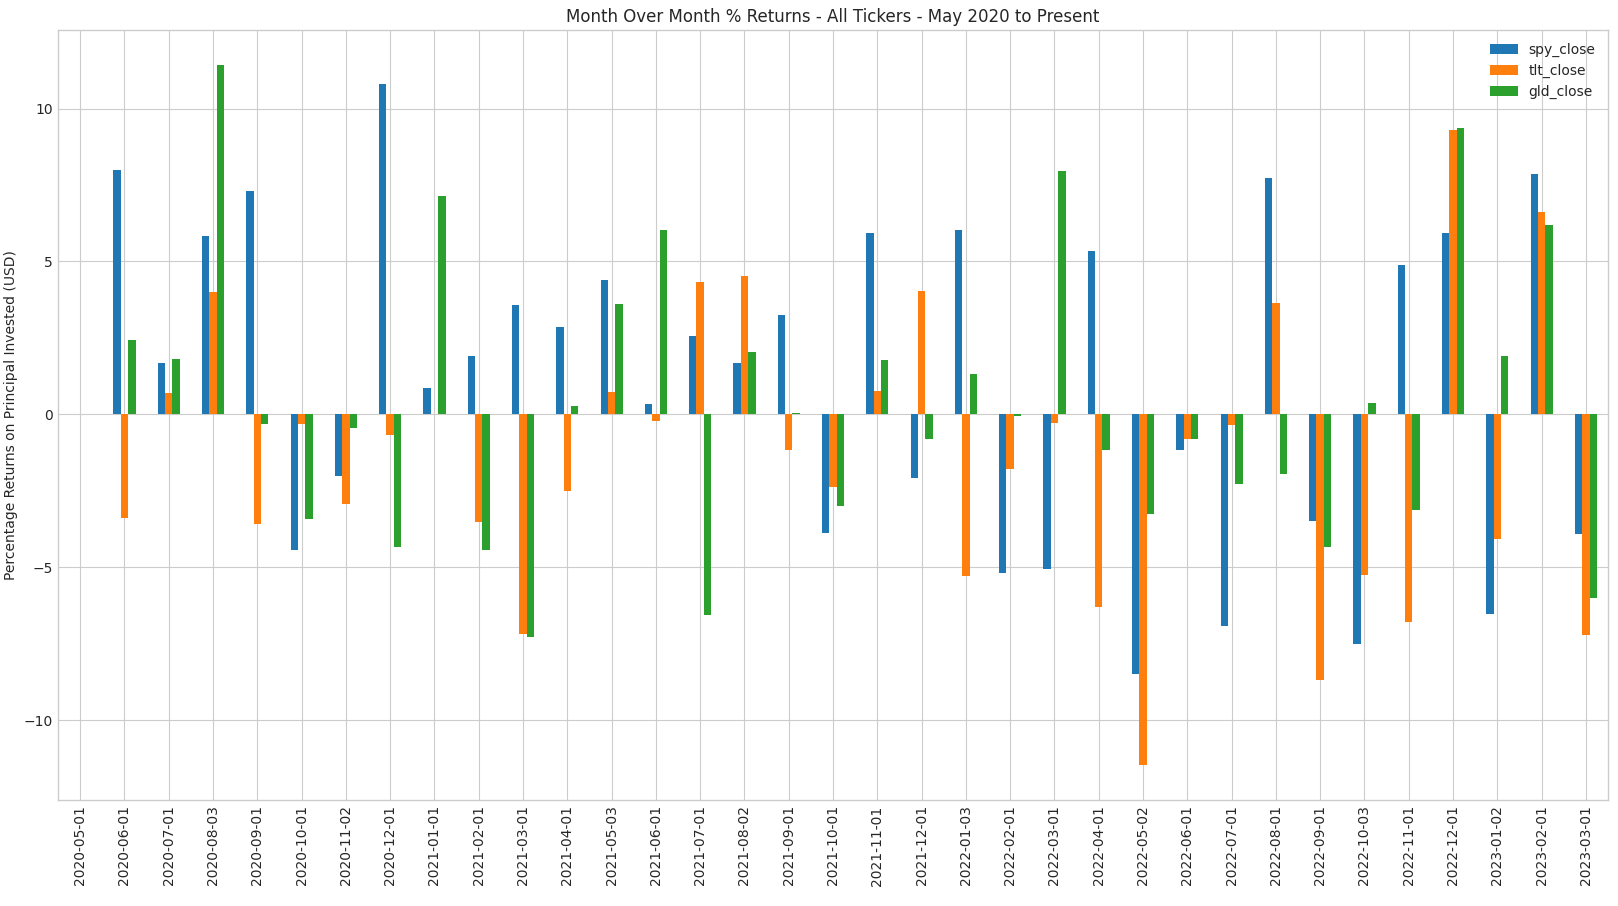

In [108]:
# Overlay of percentage returns 
with plt.style.context('seaborn-whitegrid'):
    ax = (df_concat*100).plot(y=['spy_close','tlt_close','gld_close'], kind='bar', figsize=(20,10), legend=True, title="Month Over Month % Returns - All Tickers - May 2020 to Present");
#     (spy_pct*100).plot(ax=ax, legend=True)
#     (gld_pct*100).plot(ax=ax, legend=True)
#     (tlt_pct*100).plot(ax=ax, legend=True)

    ax.set(ylabel='Percentage Returns on Principal Invested (USD)',
           xlabel=' ')
#     ax.set_xlim('2020-04', days_after_xlim_pct)
#     plt.legend(loc=(.93,.8625))
    plt.savefig("Images/OverlayMoMPercentageReturns.png");

In [109]:
tlt_pct.max()

0.09290069236333576

In [110]:
gld_pct.max()

0.11415196254951376

In [111]:
spy_pct.max()

0.10796813955601303

In [112]:
tlt_pct.min()

-0.11482096993503543

In [113]:
gld_pct.min()

-0.0728921540492452

In [114]:
spy_pct.min()

-0.084871500485737

In [115]:
btc_chg.max()

close    0.594222
dtype: float64

In [116]:
btc_chg.min()

close   -0.355927
dtype: float64

In [117]:
# max_df = pd.DataFrame

In [118]:
# max_df.columns = [['gld_max','spy_max','tlt_max']]
# max_df

In [119]:
# max_df['gld_max'] = gld_pct.max()
# max_df

In [120]:
stock_df

symbol  timestamp    open      high       low   close      volume  \
0       GLD 2020-04-08  155.91  155.9400  154.5900  154.65   7600804.0   
1       GLD 2020-04-09  158.08  159.0800  157.2100  158.58  18123039.0   
2       GLD 2020-04-13  159.17  162.3800  158.6250  161.41  20549213.0   
3       GLD 2020-04-14  162.73  164.4200  161.7800  162.66  17095086.0   
4       GLD 2020-04-15  161.80  162.5400  160.8061  162.00  12141890.0   
...     ...        ...     ...       ...       ...     ...         ...   
2305    TLT 2023-04-24  104.96  105.4875  104.8400  105.41  17035762.0   
2306    TLT 2023-04-25  106.33  107.1300  106.2800  106.96  21908546.0   
2307    TLT 2023-04-26  106.79  107.2400  105.6700  105.82  19615333.0   
2308    TLT 2023-04-27  105.20  105.2700  104.6100  104.77  20247619.0   
2309    TLT 2023-04-28  106.21  106.7600  105.8600  106.46  23824193.0   

      trade_count        vwap  
0         60704.0  155.233884  
1        140239.0  158.255634  
2        140401.0  160.906373  
3        146336.0  163.197557  
4         95518.0  161.749049  
...           ...         ...  
2305      83376.0  105.290770  
2306     141017.0  106.836469  
2307     117843.0  106.235620  
2308     108852.0  104.854365  
2309     128162.0  106.340339  

[2310 rows x 9 columns]

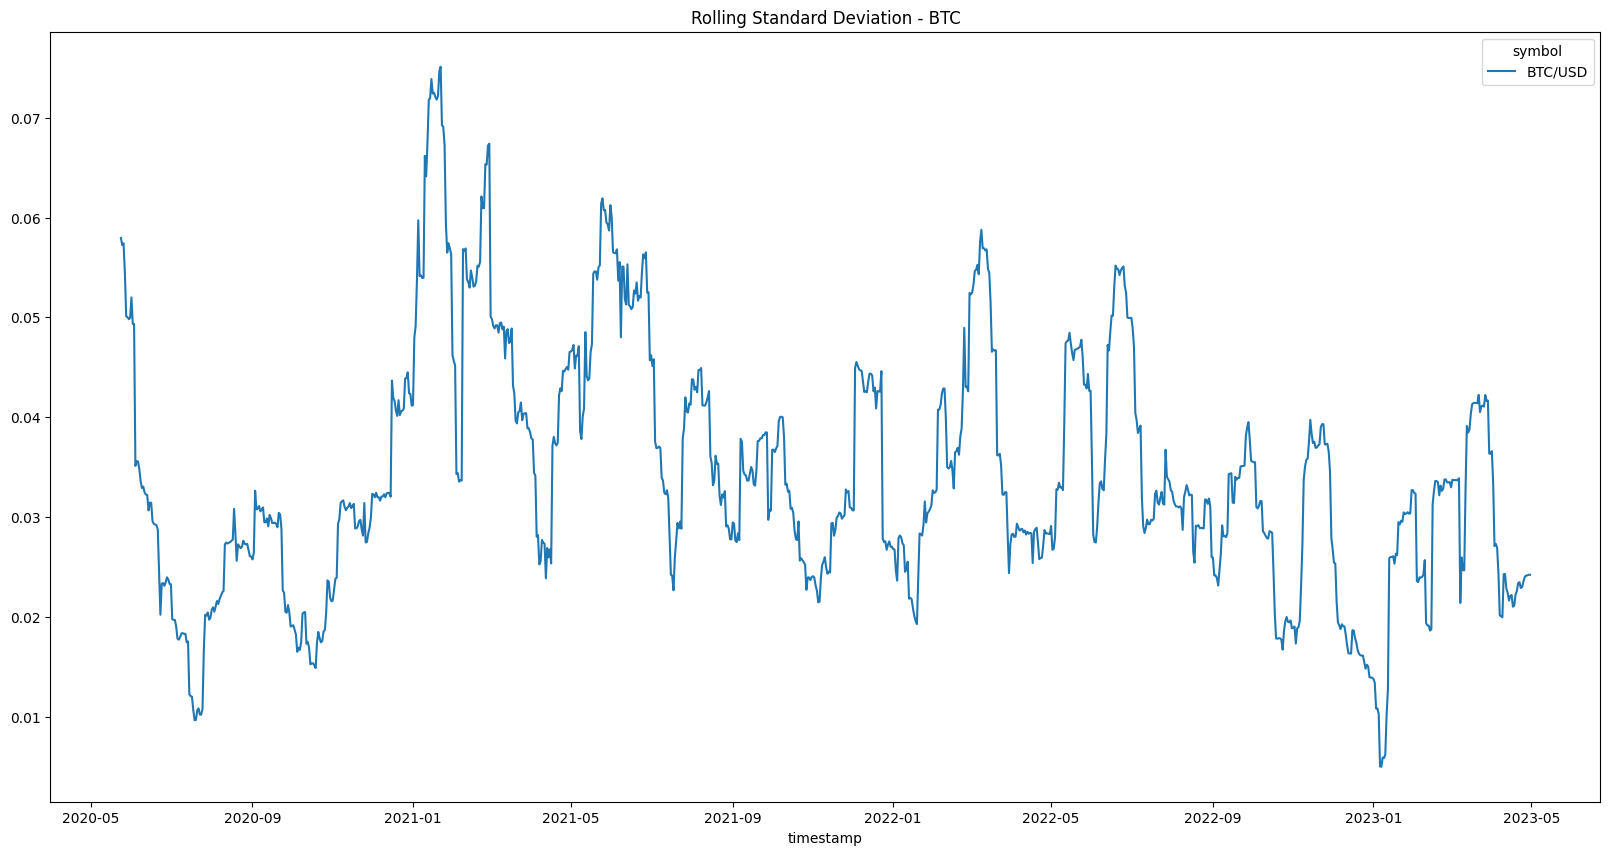

In [121]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolling = btc_daily.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC")

# Plot the rolling standard deviation
btc_rolling;
plt.savefig("Images/RollingSTD_alpaca.png")

In [122]:
# !pip install yfinance

In [123]:
import yfinance as yf

btc_data = yf.Ticker("BTC-USD")

hist = btc_data.history(period="11y")

hist

Open          High           Low  \
Date                                                                  
2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                                 ...           ...           ...   
2023-04-26 00:00:00+00:00  28300.058594  29995.837891  27324.548828   
2023-04-27 00:00:00+00:00  28428.464844  29871.546875  28402.886719   
2023-04-28 00:00:00+00:00  29481.013672  29572.791016  28929.609375   
2023-04-29 00:00:00+00:00  29336.566406  29452.455078  29088.042969   
2023-04-30 00:00:00+00:00  29242.572266  29894.720703  29125.832031   

                                  Close       Volume  Dividends  Stock Splits  
Date                                                                           
2014-09-17 00:00:00+00:00    457.334015     21056800        0.0           0.0  
2014-09-18 00:00:00+00:00    424.440002     34483200        0.0           0.0  
2014-09-19 00:00:00+00:00    394.795990     37919700        0.0           0.0  
2014-09-20 00:00:00+00:00    408.903992     36863600        0.0           0.0  
2014-09-21 00:00:00+00:00    398.821014     26580100        0.0           0.0  
...                                 ...          ...        ...           ...  
2023-04-26 00:00:00+00:00  28422.701172  31854242019        0.0           0.0  
2023-04-27 00:00:00+00:00  29473.787109  27153445027        0.0           0.0  
2023-04-28 00:00:00+00:00  29340.261719  17544464887        0.0           0.0  
2023-04-29 00:00:00+00:00  29248.488281  10662634333        0.0           0.0  
2023-04-30 00:00:00+00:00  29421.804688  14505734144        0.0           0.0  

[3148 rows x 7 columns]

In [124]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3148 entries, 2014-09-17 00:00:00+00:00 to 2023-04-30 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3148 non-null   float64
 1   High          3148 non-null   float64
 2   Low           3148 non-null   float64
 3   Close         3148 non-null   float64
 4   Volume        3148 non-null   int64  
 5   Dividends     3148 non-null   float64
 6   Stock Splits  3148 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 196.8 KB


In [125]:
hist_reset = hist.reset_index()
hist_reset

Date          Open          High           Low  \
0    2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
1    2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2    2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
3    2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
4    2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                        ...           ...           ...           ...   
3143 2023-04-26 00:00:00+00:00  28300.058594  29995.837891  27324.548828   
3144 2023-04-27 00:00:00+00:00  28428.464844  29871.546875  28402.886719   
3145 2023-04-28 00:00:00+00:00  29481.013672  29572.791016  28929.609375   
3146 2023-04-29 00:00:00+00:00  29336.566406  29452.455078  29088.042969   
3147 2023-04-30 00:00:00+00:00  29242.572266  29894.720703  29125.832031   

             Close       Volume  Dividends  Stock Splits  
0       457.334015     21056800        0.0           0.0  
1       424.440002     34483200        0.0           0.0  
2       394.795990     37919700        0.0           0.0  
3       408.903992     36863600        0.0           0.0  
4       398.821014     26580100        0.0           0.0  
...            ...          ...        ...           ...  
3143  28422.701172  31854242019        0.0           0.0  
3144  29473.787109  27153445027        0.0           0.0  
3145  29340.261719  17544464887        0.0           0.0  
3146  29248.488281  10662634333        0.0           0.0  
3147  29421.804688  14505734144        0.0           0.0  

[3148 rows x 8 columns]

In [126]:
hist_reset['Date'] = hist_reset['Date'].dt.date
hist_reset.head()

Date        Open        High         Low       Close    Volume  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [127]:
# Grabbing subset of timestamp and closing prices 
btc_sub = hist_reset[['Date', 'Close']].set_index('Date')
btc_sub.head()

Close
Date                  
2014-09-17  457.334015
2014-09-18  424.440002
2014-09-19  394.795990
2014-09-20  408.903992
2014-09-21  398.821014

In [128]:
# Calculating month over month pct change
btc_c = btc_sub.pct_change()
btc_c.head()

Close
Date                
2014-09-17       NaN
2014-09-18 -0.071926
2014-09-19 -0.069843
2014-09-20  0.035735
2014-09-21 -0.024659

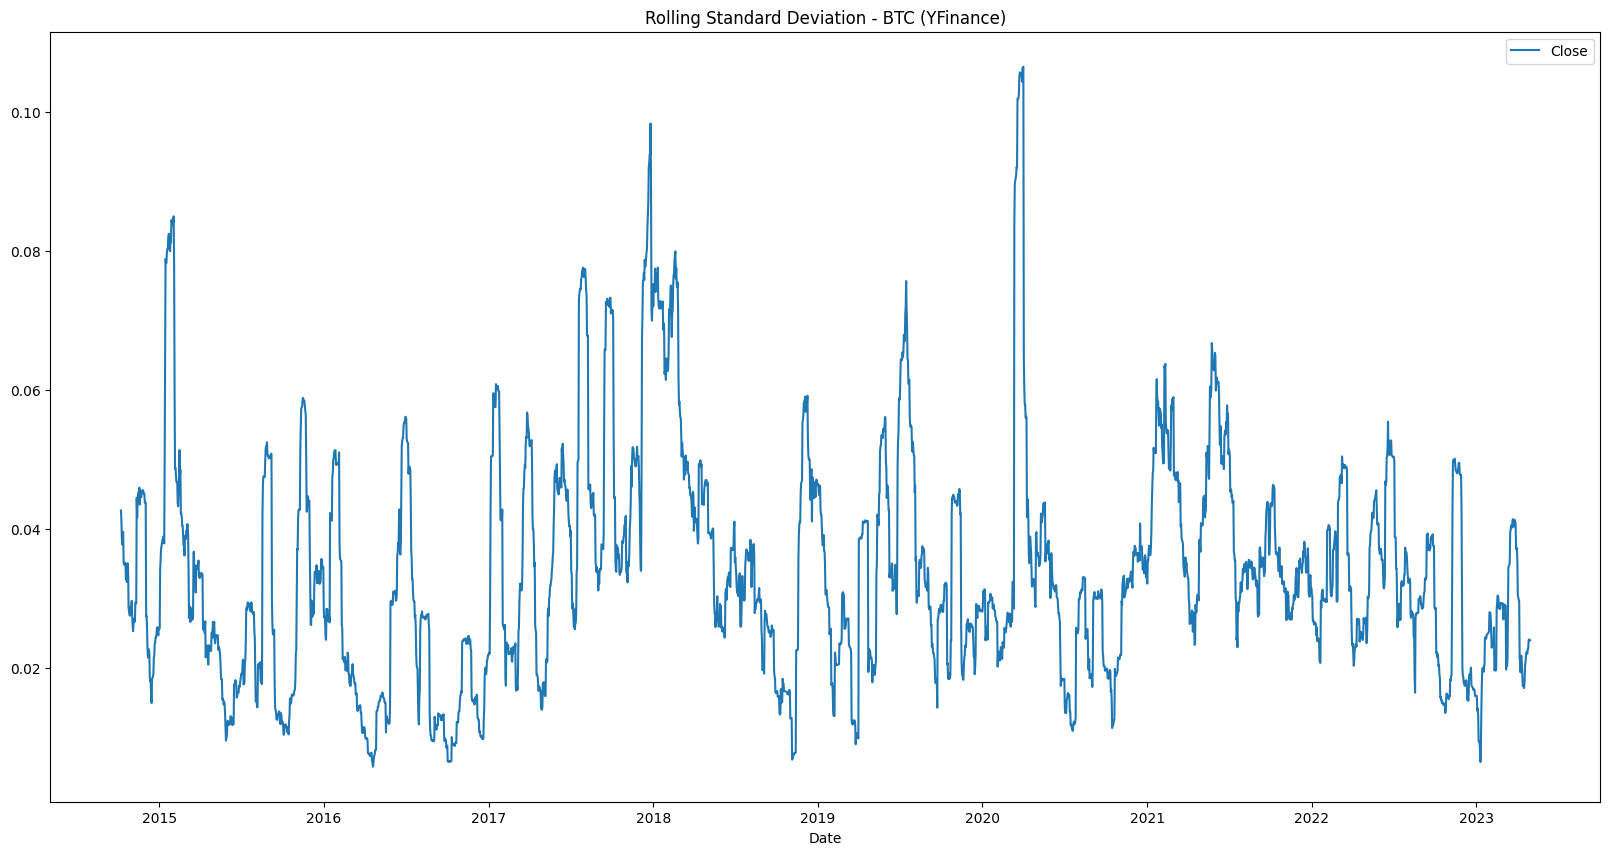

In [129]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_roll = btc_c.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (YFinance)")

# Plot the rolling standard deviation
btc_roll;
plt.savefig("Images/RollingSTD_yfinance.png")

In [130]:
yf_data = yf.download("BTC-USD", start="2011-01-01", end="2012-01-01")
yf_data

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: Data doesn't exist for startDate = 1293840000, endDate = 1325376000


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

In [131]:
# !pip install quandl

In [132]:
import quandl


In [133]:
# Save API Key for Quandl to Access
# quandl.save_key("api_key")
# print(quandl.ApiConfig.api_key)

In [134]:
# Import API Key securely
quandl.read_key()

In [135]:
# Grabbing BTC Data from Quandl
data_q = quandl.get('BCHAIN/MKPRU')  # Format is: `DATABASE_CODE/DATASET_CODE`
data_q

Value
Date                
2009-01-02      0.00
2009-01-03      0.00
2009-01-04      0.00
2009-01-05      0.00
2009-01-06      0.00
...              ...
2023-04-26  28301.71
2023-04-27  28429.72
2023-04-28  29480.35
2023-04-29  29329.63
2023-04-30  29244.68

[5232 rows x 1 columns]

In [136]:
data_q.isnull().sum()

Value    0
dtype: int64

In [137]:
# Calculating month over month pct change
btc_q = data_q.pct_change()
btc_q

Value
Date                
2009-01-02       NaN
2009-01-03       NaN
2009-01-04       NaN
2009-01-05       NaN
2009-01-06       NaN
...              ...
2023-04-26  0.028537
2023-04-27  0.004523
2023-04-28  0.036955
2023-04-29 -0.005113
2023-04-30 -0.002896

[5232 rows x 1 columns]

In [138]:
btc_qna = btc_q.dropna()
btc_qna

Value
Date                
2010-08-16       inf
2010-08-17 -1.000000
2010-08-18       inf
2010-08-19 -0.030523
2010-08-20  0.049475
...              ...
2023-04-26  0.028537
2023-04-27  0.004523
2023-04-28  0.036955
2023-04-29 -0.005113
2023-04-30 -0.002896

[4641 rows x 1 columns]

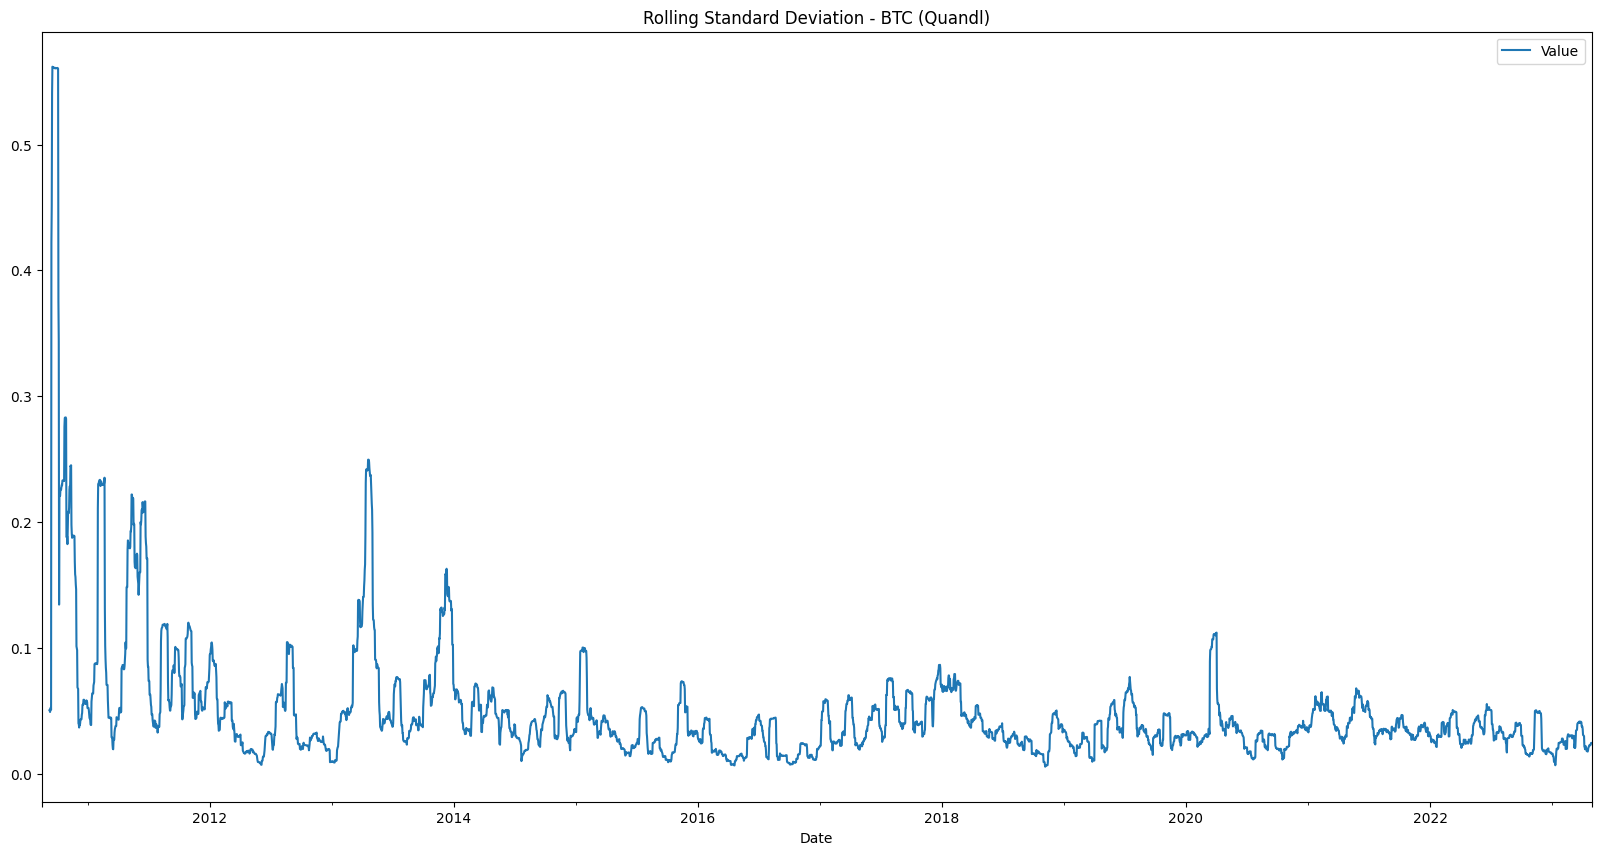

In [139]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolled = btc_qna.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (Quandl)")

# Plot the rolling standard deviation
btc_rolled;
plt.savefig("Images/RollingSTD_quandl.png")

In [140]:
data_slice = data_q['2010-09-15':'2023']
data_slice.head()

Value
Date                
2010-09-15  0.061900
2010-09-16  0.150000
2010-09-17  0.060900
2010-09-18  0.062599
2010-09-19  0.060000

In [141]:
# Calculating month over month pct change
btc_cambio = data_slice.pct_change()
btc_cambio.head()

Value
Date                
2010-09-15       NaN
2010-09-16  1.423263
2010-09-17 -0.594000
2010-09-18  0.027898
2010-09-19 -0.041518

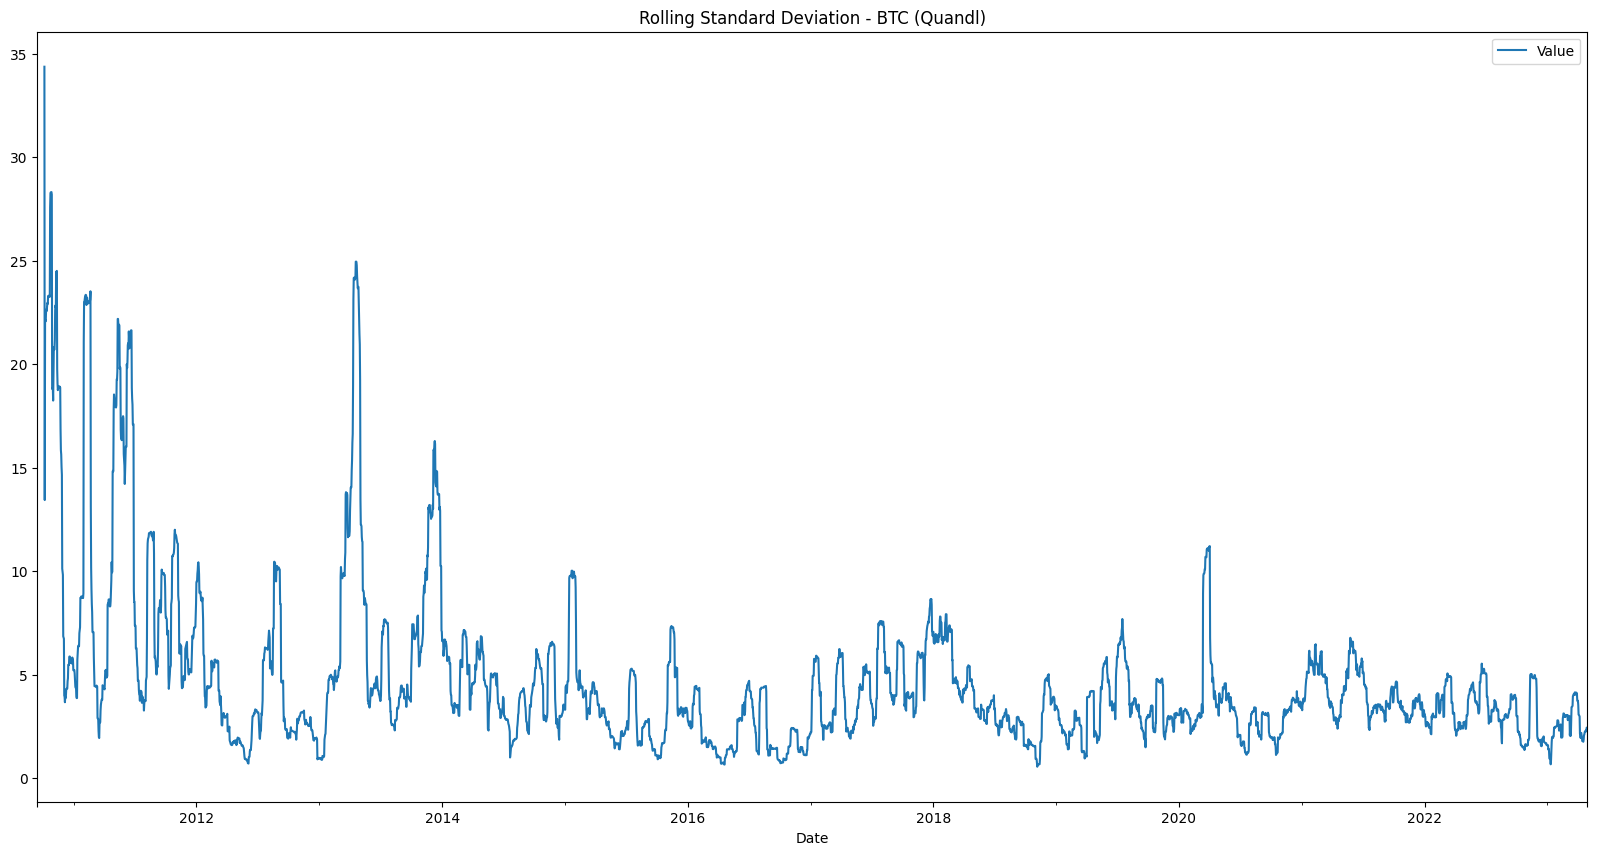

In [142]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolls = (btc_cambio*100).rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (Quandl)")

# Plot the rolling standard deviation
btc_rolls;
plt.savefig("Images/RollingSTD_quandl_sept.png")

In [143]:
# Grabbing last 30 days
btc_last_30 = btc_df.tail(30)
btc_last_30.head()

symbol  timestamp      open      high       low     close       volume  \
1058  BTC/USD 2023-04-01  28588.76  28605.10  28257.82  28404.03   3835.21554   
1059  BTC/USD 2023-04-02  28404.32  28508.68  27579.82  27721.50   6977.72320   
1060  BTC/USD 2023-04-03  27723.97  28522.00  27300.00  27823.92  14202.43909   
1061  BTC/USD 2023-04-04  27827.33  28786.01  27823.59  28513.19  10372.33415   
1062  BTC/USD 2023-04-05  28518.32  28752.57  27861.98  28089.42   8959.36960   

      trade_count          vwap  
1058      91695.0  28443.351585  
1059     144550.0  28061.981229  
1060     234335.0  28033.088149  
1061     167848.0  28262.442598  
1062     149908.0  28228.581600

In [144]:
# Subset of timestamp and close
btc_30 = btc_last_30[['timestamp','close']]
btc_30.head()

timestamp     close
1058 2023-04-01  28404.03
1059 2023-04-02  27721.50
1060 2023-04-03  27823.92
1061 2023-04-04  28513.19
1062 2023-04-05  28089.42

In [145]:
# Setting timestamp as index
btc_30_index = btc_30.set_index('timestamp')
btc_30_index.head()

close
timestamp           
2023-04-01  28404.03
2023-04-02  27721.50
2023-04-03  27823.92
2023-04-04  28513.19
2023-04-05  28089.42

In [146]:
# Running daily percentage change
btc_last_pct = btc_30_index.pct_change()
btc_last_pct.head()

close
timestamp           
2023-04-01       NaN
2023-04-02 -0.024029
2023-04-03  0.003695
2023-04-04  0.024773
2023-04-05 -0.014862

In [147]:
# Checking info
btc_last_pct.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2023-04-01 to 2023-04-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   29 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [148]:
# Convert index back to string to prep for plotting
btc_last_pct.index = btc_last_pct.index.strftime("%Y-%m-%d")
btc_last_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 2023-04-01 to 2023-04-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   29 non-null     float64
dtypes: float64(1)
memory usage: 480.0+ bytes


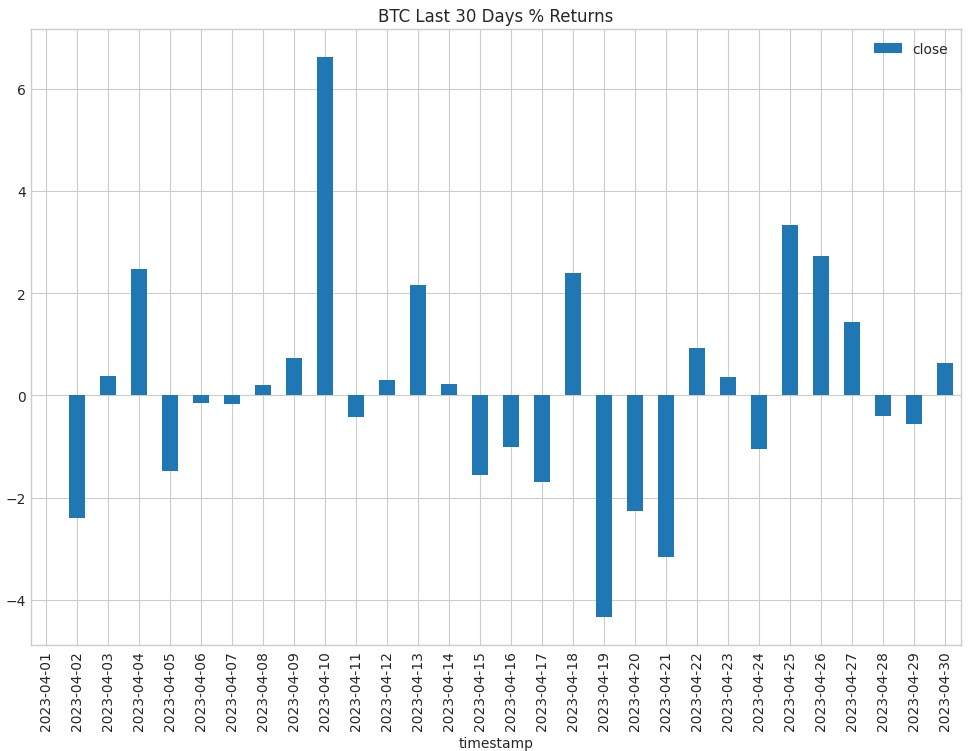

In [149]:
# Plot performance in last 30 days percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (btc_last_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="BTC Last 30 Days % Returns");
    plt.savefig("Images/BTCDailyPercentReturns.png")

In [150]:
import plotly.express as px

In [151]:
# Comparing Plotly
fig = px.bar(btc_last_pct*100, 
  y="close",
  x=btc_last_pct.index,
  title="BTC Last 30 Days % Returns",
  template="simple_white",
  labels={"close": "Daily Change (%)"},
  width=900, 
  height=800,
            )

fig.update_xaxes(title_text='Days', dtick="d1")

fig.update_layout(title_x=0.5, xaxis_tickformat='%d-%b')

# fig.write_image("Images/plotly_btc_last_30.png")

In [152]:
btc_nov_low = btc_df.set_index('timestamp')
btc_nov_low.head()

symbol    open    high     low   close  volume  trade_count  \
timestamp                                                                  
2020-04-08  BTC/USD  7314.0  7314.0  7314.0  7314.0  0.0001          1.0   
2020-04-14  BTC/USD  7101.5  7101.5  7100.0  7100.0  0.0002          2.0   
2020-04-22  BTC/USD  7118.5  7118.5  7118.5  7118.5  0.0001          1.0   
2020-04-28  BTC/USD  7748.5  7836.0  7748.5  7836.0  0.0840          2.0   
2020-04-30  BTC/USD  8829.0  8829.0  8653.0  8653.0  0.0134          3.0   

                  vwap  
timestamp               
2020-04-08  7314.00000  
2020-04-14  7100.75000  
2020-04-22  7118.50000  
2020-04-28  7835.68750  
2020-04-30  8715.80597

In [153]:
btc_seit = btc_nov_low['close']
btc_seit.head()

timestamp
2020-04-08    7314.0
2020-04-14    7100.0
2020-04-22    7118.5
2020-04-28    7836.0
2020-04-30    8653.0
Name: close, dtype: float64

In [154]:
btc_nov_index = btc_seit['2022-11-21':]
btc_nov_index.head()

timestamp
2022-11-21    15781.17
2022-11-22    16445.38
2022-11-23    16638.24
2022-11-24    16347.57
2022-11-25    16615.59
Name: close, dtype: float64

In [155]:
# btc_365.min()

In [156]:
# btc_365[btc_365['close'] == 15781.17]

In [157]:
btc_nov_pct = btc_nov_index.pct_change()
btc_nov_pct.head()

timestamp
2022-11-21         NaN
2022-11-22    0.042089
2022-11-23    0.011727
2022-11-24   -0.017470
2022-11-25    0.016395
Name: close, dtype: float64

In [158]:
# Up off November lows
btc_nov_cumprod = (1 + btc_nov_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
btc_nov_round = round((btc_nov_cumprod*100)-100,2)
btc_nov_round.head()

timestamp
2022-11-21     NaN
2022-11-22    4.21
2022-11-23    5.43
2022-11-24    3.59
2022-11-25    5.29
Name: close, dtype: float64

In [159]:
# Plotly - BTC off November lows line chart
fig = px.line(btc_nov_round, 
  y="close",
  x=btc_nov_round.index,
  title="BTC - % Returns Off November Lows",
  template="simple_white",
  labels={"close": "Percentage Change"},
  width=900, 
  height=800,
            )

fig.update_xaxes(title_text='')

fig.update_layout(title_x=0.5)

fig.add_annotation( # add a text callout with arrow
    text="92%!!!", x="2023-04-11", y=97, arrowhead=1, showarrow=True
)

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [160]:
new_q = data_q['2010-08-18':]
new_q.head()

Value
Date              
2010-08-18  0.0688
2010-08-19  0.0667
2010-08-20  0.0700
2010-08-21  0.0664
2010-08-22  0.0660

In [161]:
btc_alltime_pct = new_q.pct_change()
btc_alltime_pct.head()

Value
Date                
2010-08-18       NaN
2010-08-19 -0.030523
2010-08-20  0.049475
2010-08-21 -0.051429
2010-08-22 -0.006024

In [162]:
# All Time Returns
btc_alltime_cumprod = (1 + btc_alltime_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
btc_alltime_round = round((btc_alltime_cumprod*100)-100,2)
btc_alltime_round.head()

Value
Date             
2010-08-18    NaN
2010-08-19  -3.05
2010-08-20   1.74
2010-08-21  -3.49
2010-08-22  -4.07

In [163]:
new_2010 = data_q['2010-08-18':'2010-12-31']
new_2010.head()

Value
Date              
2010-08-18  0.0688
2010-08-19  0.0667
2010-08-20  0.0700
2010-08-21  0.0664
2010-08-22  0.0660

In [164]:
btc_2010_pct = new_2010.pct_change()
btc_2010_pct.head()

Value
Date                
2010-08-18       NaN
2010-08-19 -0.030523
2010-08-20  0.049475
2010-08-21 -0.051429
2010-08-22 -0.006024

In [165]:
# 2010 Returns
btc_2010_cumprod = (1 + btc_2010_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
btc_2010_round = round((btc_2010_cumprod*100)-100,2)
btc_2010_round.head()

Value
Date             
2010-08-18    NaN
2010-08-19  -3.05
2010-08-20   1.74
2010-08-21  -3.49
2010-08-22  -4.07

In [166]:
new_q

Value
Date                  
2010-08-18      0.0688
2010-08-19      0.0667
2010-08-20      0.0700
2010-08-21      0.0664
2010-08-22      0.0660
...                ...
2023-04-26  28301.7100
2023-04-27  28429.7200
2023-04-28  29480.3500
2023-04-29  29329.6300
2023-04-30  29244.6800

[4639 rows x 1 columns]

In [167]:
new_q.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4639 entries, 2010-08-18 to 2023-04-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   4639 non-null   float64
dtypes: float64(1)
memory usage: 72.5 KB


In [168]:
new_q_pct = new_q.pct_change()*100
new_q_pct.head()

Value
Date                
2010-08-18       NaN
2010-08-19 -3.052326
2010-08-20  4.947526
2010-08-21 -5.142857
2010-08-22 -0.602410

In [169]:
round(new_q_pct.describe(),2)

Value
count  4638.00
mean      0.49
std       7.13
min     -64.63
25%      -1.48
50%       0.05
75%       1.94
max     191.67

In [170]:
fig_daily = px.box(new_q_pct, 
  x="Value", 
  title="Distribution of Daily % Returns Box Plot")

fig_daily.update_xaxes(title_text='Daily % Change')

fig_daily.update_layout(title_x=0.5)

In [171]:
# make count of positive and negative dailies to see breakdown
new_q_pos = new_q_pct[new_q_pct['Value'] > 0].count()
new_q_pos

Value    2390
dtype: int64

In [172]:
new_q_neg = new_q_pct[new_q_pct['Value'] < 0].count()
new_q_neg

Value    2212
dtype: int64

In [173]:
new_q_pos / new_q_neg

Value    1.08047
dtype: float64

In [174]:
new_q_pie = [new_q_pos,new_q_neg]
new_q_pie

[Value    2390
 dtype: int64,
 Value    2212
 dtype: int64]

In [175]:
new_q_pct_loc = new_q_pct.loc[new_q_pct['Value'] > 0,:]
new_q_pct_loc

Value
Date                
2010-08-20  4.947526
2010-08-23  6.060606
2010-08-26  5.264741
2010-08-30  8.283333
2010-09-02  5.666667
...              ...
2023-04-19  3.214374
2023-04-23  2.010379
2023-04-26  2.853672
2023-04-27  0.452305
2023-04-28  3.695534

[2390 rows x 1 columns]

In [176]:
pos = []
neg = []

for x in new_q_pct['Value']:
    if x > 0:
        pos.append(x)
    else:
        neg.append(x)
    

    
pos

[4.947526236881572,
 6.060606060606055,
 5.2647408231702775,
 8.283333333333331,
 5.666666666666664,
 6.666666666666665,
 4.0000000000000036,
 8.33166666666667,
 191.66666666666666,
 142.32633279483036,
 2.78981937602627,
 5.499999999999994,
 4.6833333333333504,
 3.6766666666666614,
 0.8102112336430656,
 3.200000000000003,
 0.1275839793281497,
 2.333333333333343,
 0.9771986970684043,
 5.499999999999994,
 0.789889415481837,
 100.01666666666668,
 5.263157894736836,
 18.999999999999993,
 10.091743119266061,
 8.999999999999986,
 2.8037383177570208,
 72.72727272727273,
 19.999999999999996,
 5.555555555555558,
 0.005263157894752624,
 1.0000000000000009,
 3.699843668577407,
 2.894736842105261,
 40.66496163682864,
 14.23809523809525,
 20.883701542309296,
 48.0,
 6.888361045130642,
 4.583333333333339,
 24.583333333333336,
 6.082036775106081,
 3.5710714285714262,
 3.214285714285703,
 0.34602076124568004,
 2.4771193328386065,
 1.9694162075112764,
 1.81818181818183,
 2.1200000000000108,
 2.2222222

In [177]:
pie_df = pd.DataFrame({'Pos_Values': [pos], 'Neg_Values': [neg]})
pie_df

Pos_Values  \
0  [4.947526236881572, 6.060606060606055, 5.26474...   

                                          Neg_Values  
0  [nan, -3.0523255813953543, -5.1428571428571495...

In [178]:
# Comparing Plotly
fig_pie = px.pie(pie_df)

fig_pie
#   y="Value",
#   x=yearly_pct.index,
#   title="BTC Annual % Returns",
#   template="simple_white",
#   labels={"Value": "Annual Change (%)"},
#   width=900, 
#   height=600,
#             )

# fig.update_xaxes(title_text='Year End')

# fig.update_layout(title_x=0.5)

# fig.write_image("Images/plotly_btc_last_30.png")

In [179]:
# make subplots of daily % change box plots grouped by year to see the evolution over time

In [180]:
new_reset = new_q.reset_index()
new_reset.head()

Date   Value
0 2010-08-18  0.0688
1 2010-08-19  0.0667
2 2010-08-20  0.0700
3 2010-08-21  0.0664
4 2010-08-22  0.0660

In [181]:
new_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4639 entries, 0 to 4638
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4639 non-null   datetime64[ns]
 1   Value   4639 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 72.6 KB


In [182]:
# Count of trading days per year
new_group = new_reset['Value'].groupby(new_reset['Date'].dt.year).count()
new_group

Date
2010    136
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    120
Name: Value, dtype: int64

In [183]:
# Attempting to get groupby year and pct change on value column but wasn't really working, found solution
# below with resample and apply
new_reset.groupby(new_reset['Date'].dt.year)['Value'].pct_change()

0            NaN
1      -0.030523
2       0.049475
3      -0.051429
4      -0.006024
          ...   
4634    0.028537
4635    0.004523
4636    0.036955
4637   -0.005113
4638   -0.002896
Name: Value, Length: 4639, dtype: float64

In [184]:
yearly = new_q.resample('A').apply(lambda x: x[-1])
yearly

Value
Date                    
2010-12-31      0.299998
2011-12-31      4.470000
2012-12-31     13.570000
2013-12-31    746.900000
2014-12-31    315.700000
2015-12-31    428.230000
2016-12-31    958.120000
2017-12-31  14165.575000
2018-12-31   3791.545833
2019-12-31   7219.600000
2020-12-31  28856.590000
2021-12-31  47132.960000
2022-12-31  16599.690000
2023-12-31  29244.680000

In [185]:
yearly_pct = round(yearly.pct_change()*100,2)
yearly_pct.head()

Value
Date               
2010-12-31      NaN
2011-12-31  1390.01
2012-12-31   203.58
2013-12-31  5404.05
2014-12-31   -57.73

In [186]:
# Comparing Plotly
fig_annual = px.bar(yearly_pct, 
  y="Value",
  x=yearly_pct.index,
  title="BTC Annual % Returns",
  template="simple_white",
  labels={"Value": "Annual Change (%)"},
  width=900, 
  height=600,
            )

fig_annual.update_xaxes(title_text='Year End')

fig_annual.update_layout(title_x=0.5)

# fig_annual.write_image("Images/plotly_btc_last_30.png")

In [187]:
# # Filtering for month start dates
# btc_monthly = btc_df[btc_df['timestamp'].dt.is_month_start] 
# btc_monthly

In [188]:
# Grabbing month end using resample and apply
monthly = new_q.resample('BM').apply(lambda x: x[-1])
monthly

Value
Date                    
2010-08-31      0.064900
2010-09-30      0.061999
2010-10-29      0.191900
2010-11-30      0.280000
2010-12-31      0.299998
...                  ...
2023-01-31  22836.090000
2023-02-28  23497.620000
2023-03-31  28033.060000
2023-04-28  29480.350000
2023-05-31  29244.680000

[154 rows x 1 columns]

In [189]:
monthly_pct = round(monthly.pct_change()*100,2)
monthly_pct.head()

Value
Date              
2010-08-31     NaN
2010-09-30   -4.47
2010-10-29  209.52
2010-11-30   45.91
2010-12-31    7.14

In [190]:
round(monthly_pct.describe(),2)

Value
count  153.00
mean    16.17
std     54.66
min    -38.77
25%    -10.61
50%      5.25
75%     25.49
max    398.97

In [191]:
fig_box_monthly = px.box(monthly_pct, 
  x="Value",
  title="Distribution of Monthly % Returns")

fig_box_monthly.update_xaxes(title_text='Monthly % Change')

fig_box_monthly.update_layout(title_x=0.5)

fig_box_monthly.add_annotation( # add a text callout with arrow
    text="2013", x=158, y=.05, arrowhead=1, showarrow=True
)

fig_box_monthly.add_annotation( # add a text callout with arrow
    text="2010", x=207, y=-.05, arrowhead=1, showarrow=True, ax=-10, ay=30
)

fig_box_monthly.add_annotation( # add a text callout with arrow
    text="2013", x=214, y=.05, arrowhead=1, showarrow=True, 
)

fig_box_monthly.add_annotation( # add a text callout with arrow
    text="2011", x=231, y=-.05, arrowhead=1, showarrow=True, ax=-10, ay=30
)

fig_box_monthly.add_annotation( # add a text callout with arrow
    text="2011", x=251, y=.05, arrowhead=1, showarrow=True, 
)

fig_box_monthly.add_annotation( # add a text callout with arrow
    text="2013", x=396, y=.05, arrowhead=1, showarrow=True, 
)

fig_box_monthly.add_annotation( # add a text callout with arrow
    text="<b>Outliers All Occurred 10+ Years Ago<b>", x=250, y=.3, showarrow=False
)

# fig_box_monthly.write_image("Images/plotly_btc_monthly_returns_dist.png")

In [192]:
# Checking dates of monthly outliers
monthly_sort = monthly_pct.sort_values('Value', ascending=False)
monthly_sort.head(10)

Value
Date              
2013-11-29  398.97
2011-05-31  253.05
2011-04-29  232.51
2011-01-31  216.67
2010-10-29  209.52
2013-03-29  160.91
2011-06-30   81.02
2017-05-31   71.71
2013-02-28   63.75
2013-10-31   60.02

In [193]:
# Grouping GLD by business month start; nth isolates by symbol
gld_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(0)
gld_group_df.head()

symbol      open    high     low   close      volume  trade_count  \
timestamp                                                                      
2020-04-01    GLD  155.9100  155.94  154.59  154.65   7600804.0      60704.0   
2020-05-01    GLD  157.9500  160.45  157.80  159.78  10914334.0      87024.0   
2020-06-01    GLD  162.9235  163.74  162.39  163.66   8155048.0      60202.0   
2020-07-01    GLD  167.0500  167.06  165.34  166.62  13214759.0      86821.0   
2020-08-03    GLD  185.0500  185.82  184.20  185.64  12896999.0      93696.0   

                  vwap  
timestamp               
2020-04-01  155.233884  
2020-05-01  159.380639  
2020-06-01  163.323352  
2020-07-01  166.229189  
2020-08-03  185.228945

In [194]:
gld_test = stock_index.groupby('symbol').nth(0)
gld_test

open    high       low   close       volume  trade_count        vwap
symbol                                                                        
GLD     155.91  155.94  154.5900  154.65    7600804.0      60704.0  155.233884
SPY     267.96  276.00  265.2542  274.00  153774487.0     950859.0  271.051454
TLT     165.11  166.19  164.1300  165.09   10147077.0      63686.0  165.217491

In [195]:
gld_loc = stock_index.loc[stock_index['symbol'] == 'GLD',:]
gld_loc[gld_loc.index == '2020-04-30']

symbol    open    high     low  close      volume  trade_count  \
timestamp                                                                   
2020-04-30    GLD  160.22  160.82  158.13  158.8  13633483.0     107884.0   

                  vwap  
timestamp               
2020-04-30  159.269773

In [196]:
gld_monthly2 = gld_loc.resample('BM').apply(lambda x: x[-1])
gld_monthly2.head()

symbol    open      high      low   close      volume  trade_count  \
timestamp                                                                       
2020-04-30    GLD  160.22  160.8200  158.130  158.80  13633483.0     107884.0   
2020-05-29    GLD  162.58  163.4000  162.320  162.91  12584009.0      70183.0   
2020-06-30    GLD  166.31  167.9906  166.185  167.37  12762597.0      84161.0   
2020-07-31    GLD  184.51  185.7501  184.165  185.56  15885010.0     107782.0   
2020-08-31    GLD  184.79  185.5300  184.280  184.82  10251152.0      71796.0   

                  vwap  
timestamp               
2020-04-30  159.269773  
2020-05-29  162.852059  
2020-06-30  167.268997  
2020-07-31  185.142863  
2020-08-31  184.986839

In [197]:
spy_loc = stock_index.loc[stock_index['symbol'] == 'SPY',:]
spy_loc[spy_loc.index == '2020-04-30']

symbol    open      high     low   close       volume  trade_count  \
timestamp                                                                       
2020-04-30    SPY  291.71  293.3239  288.59  290.63  123003721.0     650783.0   

                  vwap  
timestamp               
2020-04-30  290.584103

In [198]:
spy_monthly2 = spy_loc.resample('BM').apply(lambda x: x[-1])
spy_monthly2.head()

symbol    open      high     low     close       volume  \
timestamp                                                            
2020-04-30    SPY  291.71  293.3239  288.59  290.6300  123003721.0   
2020-05-29    SPY  302.46  304.9600  299.47  304.4900  119265702.0   
2020-06-30    SPY  304.01  310.2000  303.82  308.9400  113444772.0   
2020-07-31    SPY  325.90  326.6300  321.33  326.4000   85211555.0   
2020-08-31    SPY  350.35  351.3000  349.06  349.8206   66099183.0   

            trade_count        vwap  
timestamp                            
2020-04-30     650783.0  290.584103  
2020-05-29     667925.0  302.753666  
2020-06-30     523384.0  307.462538  
2020-07-31     448876.0  324.494578  
2020-08-31     322309.0  350.256348

In [199]:
tlt_loc = stock_index.loc[stock_index['symbol'] == 'TLT',:]
tlt_loc[tlt_loc.index == '2020-04-30']

symbol    open    high     low   close      volume  trade_count  \
timestamp                                                                    
2020-04-30    TLT  168.74  169.23  166.71  166.74  11606074.0      62765.0   

                  vwap  
timestamp               
2020-04-30  167.875507

In [200]:
tlt_monthly2 = tlt_loc.resample('BM').apply(lambda x: x[-1])
tlt_monthly2.head()

symbol    open      high      low   close      volume  trade_count  \
timestamp                                                                       
2020-04-30    TLT  168.74  169.2300  166.710  166.74  11606074.0      62765.0   
2020-05-29    TLT  162.71  164.0900  162.355  163.59  14662054.0      75454.0   
2020-06-30    TLT  165.23  165.2900  163.480  163.93  14841678.0      79244.0   
2020-07-31    TLT  170.15  171.4554  169.940  171.00   8886264.0      57269.0   
2020-08-31    TLT  161.60  163.2500  161.560  162.19  11388108.0      75800.0   

                  vwap  
timestamp               
2020-04-30  167.875507  
2020-05-29  163.264590  
2020-06-30  164.132873  
2020-07-31  170.685787  
2020-08-31  162.449506

In [201]:
# Revising column names to prep for join

gld_dict2 = {'close':'GLD'}

gld_monthly2 = gld_monthly2.rename(columns=gld_dict2)
gld_monthly2


tlt_dict2 = {'close':'TLT'}

tlt_monthly2 = tlt_monthly2.rename(columns=tlt_dict2)


spy_dict2 = {'close':'SPY'}

spy_monthly2 = spy_monthly2.rename(columns=spy_dict2)
spy_monthly2.head()


symbol    open      high     low       SPY       volume  \
timestamp                                                            
2020-04-30    SPY  291.71  293.3239  288.59  290.6300  123003721.0   
2020-05-29    SPY  302.46  304.9600  299.47  304.4900  119265702.0   
2020-06-30    SPY  304.01  310.2000  303.82  308.9400  113444772.0   
2020-07-31    SPY  325.90  326.6300  321.33  326.4000   85211555.0   
2020-08-31    SPY  350.35  351.3000  349.06  349.8206   66099183.0   

            trade_count        vwap  
timestamp                            
2020-04-30     650783.0  290.584103  
2020-05-29     667925.0  302.753666  
2020-06-30     523384.0  307.462538  
2020-07-31     448876.0  324.494578  
2020-08-31     322309.0  350.256348

In [202]:
new_q

Value
Date                  
2010-08-18      0.0688
2010-08-19      0.0667
2010-08-20      0.0700
2010-08-21      0.0664
2010-08-22      0.0660
...                ...
2023-04-26  28301.7100
2023-04-27  28429.7200
2023-04-28  29480.3500
2023-04-29  29329.6300
2023-04-30  29244.6800

[4639 rows x 1 columns]

In [221]:
data_q

Value
Date                
2009-01-02      0.00
2009-01-03      0.00
2009-01-04      0.00
2009-01-05      0.00
2009-01-06      0.00
...              ...
2023-04-26  28301.71
2023-04-27  28429.72
2023-04-28  29480.35
2023-04-29  29329.63
2023-04-30  29244.68

[5232 rows x 1 columns]

In [233]:
btc_resamp = data_q['2020-04-01':]
btc_resamp.head()

Value
Date               
2020-04-01  6428.28
2020-04-02  6652.87
2020-04-03  6809.11
2020-04-04  6741.67
2020-04-05  6871.69

In [234]:
btc_resamp2 = btc_resamp.resample('BM').apply(lambda x: x[-1])
btc_resamp2.tail()

Value
Date                
2023-01-31  22836.09
2023-02-28  23497.62
2023-03-31  28033.06
2023-04-28  29480.35
2023-05-31  29244.68

In [235]:
btc_dict2 = {'Value':'BTC'}

btc_resamp2 = btc_resamp2.rename(columns=btc_dict2)
btc_resamp2.head()

BTC
Date                
2020-04-30   8777.63
2020-05-29   9569.21
2020-06-30   9185.35
2020-07-31  11114.93
2020-08-31  11707.78

In [236]:
# Testing concat of gld and btc after resample, seems to work now
new_concat = pd.concat([btc_resamp2, gld_monthly2, spy_monthly2, tlt_monthly2], axis=1)
new_concat.tail()

BTC  symbol     open     high     low     GLD     volume  \
2023-01-31  22836.09     GLD  178.820  179.699  178.54  179.41  5977001.0   
2023-02-28  23497.62     GLD  168.781  170.250  168.59  169.78  6762197.0   
2023-03-31  28033.06     GLD  184.110  184.420  182.80  183.22  7553499.0   
2023-04-28  29480.35     GLD  184.790  185.380  184.17  184.80  6308223.0   
2023-05-31  29244.68     NaN      NaN      NaN     NaN     NaN        NaN   

            trade_count        vwap  symbol  ...  trade_count        vwap  \
2023-01-31      32720.0  179.238382     SPY  ...     513130.0  404.159126   
2023-02-28      49710.0  169.643931     SPY  ...     601272.0  397.419803   
2023-03-31      64073.0  183.503531     SPY  ...     690249.0  407.199127   
2023-04-28      50918.0  184.783307     SPY  ...     592226.0  414.377425   
2023-05-31          NaN         NaN     NaN  ...          NaN         NaN   

            symbol    open    high      low     TLT      volume  trade_count  \
2023-01-31     TLT  106.98  107.28  105.870  107.17  13706800.0      90604.0   
2023-02-28     TLT  100.57  101.72  100.280  101.71  14956342.0     100754.0   
2023-03-31     TLT  105.35  106.56  105.075  106.37  22338075.0     125397.0   
2023-04-28     TLT  106.21  106.76  105.860  106.46  23824193.0     128162.0   
2023-05-31     NaN     NaN     NaN      NaN     NaN         NaN          NaN   

                  vwap  
2023-01-31  106.551306  
2023-02-28  101.091431  
2023-03-31  105.921266  
2023-04-28  106.340339  
2023-05-31         NaN  

[5 rows x 25 columns]

In [237]:
new_concat = new_concat.dropna()
new_concat.tail()

BTC  symbol     open      high      low     GLD     volume  \
2022-12-30  16630.49     GLD  169.260  169.8999  168.795  169.64  2850758.0   
2023-01-31  22836.09     GLD  178.820  179.6990  178.540  179.41  5977001.0   
2023-02-28  23497.62     GLD  168.781  170.2500  168.590  169.78  6762197.0   
2023-03-31  28033.06     GLD  184.110  184.4200  182.800  183.22  7553499.0   
2023-04-28  29480.35     GLD  184.790  185.3800  184.170  184.80  6308223.0   

            trade_count        vwap  symbol  ...  trade_count        vwap  \
2022-12-30      28429.0  169.393876     SPY  ...     544591.0  381.220108   
2023-01-31      32720.0  179.238382     SPY  ...     513130.0  404.159126   
2023-02-28      49710.0  169.643931     SPY  ...     601272.0  397.419803   
2023-03-31      64073.0  183.503531     SPY  ...     690249.0  407.199127   
2023-04-28      50918.0  184.783307     SPY  ...     592226.0  414.377425   

            symbol    open    high      low     TLT      volume  trade_count  \
2022-12-30     TLT   99.87  100.55   99.370   99.56  20808679.0     124396.0   
2023-01-31     TLT  106.98  107.28  105.870  107.17  13706800.0      90604.0   
2023-02-28     TLT  100.57  101.72  100.280  101.71  14956342.0     100754.0   
2023-03-31     TLT  105.35  106.56  105.075  106.37  22338075.0     125397.0   
2023-04-28     TLT  106.21  106.76  105.860  106.46  23824193.0     128162.0   

                  vwap  
2022-12-30   99.820879  
2023-01-31  106.551306  
2023-02-28  101.091431  
2023-03-31  105.921266  
2023-04-28  106.340339  

[5 rows x 25 columns]

In [238]:
latest_quote["BTC/USD"].ask_price

29432.0

In [239]:
new_concat_cols = new_concat[['BTC','GLD','SPY','TLT']]
new_concat_cols.head()

BTC     GLD       SPY     TLT
2020-04-30   8777.63  158.80  290.6300  166.74
2020-05-29   9569.21  162.91  304.4900  163.59
2020-06-30   9185.35  167.37  308.9400  163.93
2020-07-31  11114.93  185.56  326.4000  171.00
2020-08-31  11707.78  184.82  349.8206  162.19

In [302]:
new_concat_slice = new_concat_cols[:'2023-04-30']
new_concat_slice.tail()

BTC     GLD     SPY     TLT
2022-12-30  16630.49  169.64  382.43   99.56
2023-01-31  22836.09  179.41  406.48  107.17
2023-02-28  23497.62  169.78  396.26  101.71
2023-03-31  28033.06  183.22  409.39  106.37
2023-04-28  29480.35  184.80  415.93  106.46

In [303]:
new_concat_pct = new_concat_slice.pct_change()
new_concat_pct.tail()

BTC       GLD       SPY       TLT
2022-12-30  0.012035  0.029306 -0.061936 -0.030858
2023-01-31  0.373146  0.057593  0.062887  0.076436
2023-02-28  0.028969 -0.053676 -0.025143 -0.050947
2023-03-31  0.193017  0.079161  0.033135  0.045817
2023-04-28  0.051628  0.008624  0.015975  0.000846

In [304]:
concat_three_mos = new_concat_pct.tail(3)
concat_three_mos

BTC       GLD       SPY       TLT
2023-02-28  0.028969 -0.053676 -0.025143 -0.050947
2023-03-31  0.193017  0.079161  0.033135  0.045817
2023-04-28  0.051628  0.008624  0.015975  0.000846

In [310]:
# Comparing Plotly
fig_3mos = px.bar(concat_three_mos, 
  y=["BTC","GLD","SPY","TLT"],
  x=['Feb 28','Mar 31','Apr 28'],
#   x=concat_three_mos.index,
  barmode='group',
  text_auto='.0%', #show individual % values
  title="Last 3 Mos % Returns",
  template="simple_white",
  labels={"value": "Monthly Change (%)"},
  width=950, 
  height=600,
#   range_x=['2023-01-01','2023-04-30']
            )

fig_3mos.update_xaxes(title_text='')

# fig_3mos.update_xaxes(title_text='', dtick='M1', tickformat="%b %e \n%Y")

fig_3mos.update_layout(title_x=0.5,legend_title_text='Tickers', yaxis={
        'tickformat': '.0%' #update y axis with numbers as %
    })

# fig_3mos.write_image("Images/last_three_mos.png")

In [244]:
new_concat['BTC_SPY'] = new_concat['BTC']/new_concat['SPY']
new_concat.head()

BTC  symbol    open      high      low     GLD      volume  \
2020-04-30   8777.63     GLD  160.22  160.8200  158.130  158.80  13633483.0   
2020-05-29   9569.21     GLD  162.58  163.4000  162.320  162.91  12584009.0   
2020-06-30   9185.35     GLD  166.31  167.9906  166.185  167.37  12762597.0   
2020-07-31  11114.93     GLD  184.51  185.7501  184.165  185.56  15885010.0   
2020-08-31  11707.78     GLD  184.79  185.5300  184.280  184.82  10251152.0   

           trade_count        vwap  symbol  ...        vwap  symbol    open  \
2020-04-30    107884.0  159.269773     SPY  ...  290.584103     TLT  168.74   
2020-05-29     70183.0  162.852059     SPY  ...  302.753666     TLT  162.71   
2020-06-30     84161.0  167.268997     SPY  ...  307.462538     TLT  165.23   
2020-07-31    107782.0  185.142863     SPY  ...  324.494578     TLT  170.15   
2020-08-31     71796.0  184.986839     SPY  ...  350.256348     TLT  161.60   

                high      low     TLT      volume trade_count        vwap  \
2020-04-30  169.2300  166.710  166.74  11606074.0     62765.0  167.875507   
2020-05-29  164.0900  162.355  163.59  14662054.0     75454.0  163.264590   
2020-06-30  165.2900  163.480  163.93  14841678.0     79244.0  164.132873   
2020-07-31  171.4554  169.940  171.00   8886264.0     57269.0  170.685787   
2020-08-31  163.2500  161.560  162.19  11388108.0     75800.0  162.449506   

              BTC_SPY  
2020-04-30  30.202078  
2020-05-29  31.427009  
2020-06-30  29.731825  
2020-07-31  34.053094  
2020-08-31  33.467955  

[5 rows x 26 columns]

In [245]:
new_concat['BTC_GLD'] = new_concat['BTC']/new_concat['GLD']
new_concat.head()

BTC  symbol    open      high      low     GLD      volume  \
2020-04-30   8777.63     GLD  160.22  160.8200  158.130  158.80  13633483.0   
2020-05-29   9569.21     GLD  162.58  163.4000  162.320  162.91  12584009.0   
2020-06-30   9185.35     GLD  166.31  167.9906  166.185  167.37  12762597.0   
2020-07-31  11114.93     GLD  184.51  185.7501  184.165  185.56  15885010.0   
2020-08-31  11707.78     GLD  184.79  185.5300  184.280  184.82  10251152.0   

            trade_count        vwap  symbol  ...  symbol    open      high  \
2020-04-30     107884.0  159.269773     SPY  ...     TLT  168.74  169.2300   
2020-05-29      70183.0  162.852059     SPY  ...     TLT  162.71  164.0900   
2020-06-30      84161.0  167.268997     SPY  ...     TLT  165.23  165.2900   
2020-07-31     107782.0  185.142863     SPY  ...     TLT  170.15  171.4554   
2020-08-31      71796.0  184.986839     SPY  ...     TLT  161.60  163.2500   

                low     TLT      volume  trade_count        vwap    BTC_SPY  \
2020-04-30  166.710  166.74  11606074.0      62765.0  167.875507  30.202078   
2020-05-29  162.355  163.59  14662054.0      75454.0  163.264590  31.427009   
2020-06-30  163.480  163.93  14841678.0      79244.0  164.132873  29.731825   
2020-07-31  169.940  171.00   8886264.0      57269.0  170.685787  34.053094   
2020-08-31  161.560  162.19  11388108.0      75800.0  162.449506  33.467955   

              BTC_GLD  
2020-04-30  55.274748  
2020-05-29  58.739243  
2020-06-30  54.880504  
2020-07-31  59.899386  
2020-08-31  63.346932  

[5 rows x 27 columns]

In [247]:
btc_spy_slice = new_concat[['BTC','GLD','SPY','TLT','BTC_SPY','BTC_GLD']]
btc_spy_slice.head()

BTC     GLD       SPY     TLT    BTC_SPY    BTC_GLD
2020-04-30   8777.63  158.80  290.6300  166.74  30.202078  55.274748
2020-05-29   9569.21  162.91  304.4900  163.59  31.427009  58.739243
2020-06-30   9185.35  167.37  308.9400  163.93  29.731825  54.880504
2020-07-31  11114.93  185.56  326.4000  171.00  34.053094  59.899386
2020-08-31  11707.78  184.82  349.8206  162.19  33.467955  63.346932

In [248]:
btc_spy_slice.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2020-04-30 to 2023-04-28
Freq: BM
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC      37 non-null     float64
 1   GLD      37 non-null     float64
 2   SPY      37 non-null     float64
 3   TLT      37 non-null     float64
 4   BTC_SPY  37 non-null     float64
 5   BTC_GLD  37 non-null     float64
dtypes: float64(6)
memory usage: 3.1 KB


In [249]:
# Plotly - BTC:SPY Line Chart
fig_ratio = px.line(btc_spy_slice, 
  y="BTC_SPY",
#   x=btc_nov_round.index,
  title="Ratio of BTC:SPY ",
  template="simple_white",
  labels={"BTC_SPY": "BTC:SPY Ratio"},
  width=900, 
  height=800,
            )

fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_ratio.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [250]:
# Plotly - BTC:GLD Line Chart
fig_ratio = px.line(btc_spy_slice, 
  y="BTC_GLD",
#   x=btc_nov_round.index,
  title="Ratio of BTC:GLD",
  template="simple_white",
  labels={"BTC_GLD": "BTC:GLD Ratio"},
  width=900, 
  height=800,
            )

fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_ratio.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

The correlation between both factors is -0.07


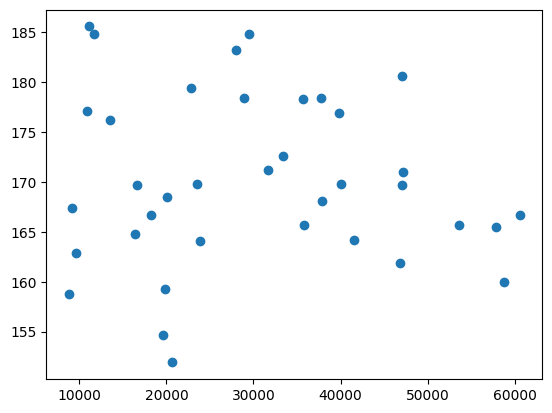

In [251]:
plt.scatter(btc_spy_slice['BTC'], btc_spy_slice['GLD'])
plt.show
correlation_btc = st.pearsonr(btc_spy_slice['BTC'], btc_spy_slice['GLD'])
print(f"The correlation between both factors is {round(correlation_btc[0],2)}")

In [252]:
correlation_btc

PearsonRResult(statistic=-0.07495060721368683, pvalue=0.6592999251268292)

The correlation between both factors is 0.79


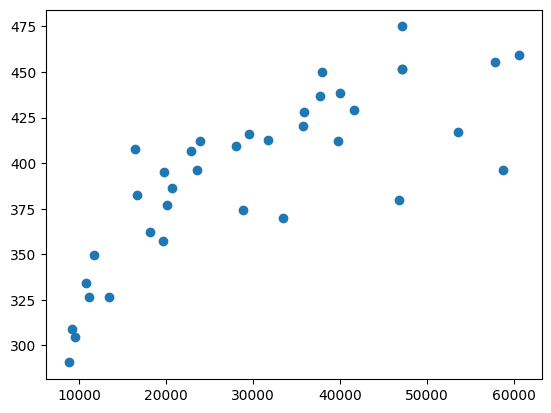

In [253]:
plt.scatter(btc_spy_slice['BTC'], btc_spy_slice['SPY'])
plt.show
corr_btc_spy = st.pearsonr(btc_spy_slice['BTC'], btc_spy_slice['SPY'])
print(f"The correlation between both factors is {round(corr_btc_spy[0],2)}")

In [254]:
corr_btc_spy

PearsonRResult(statistic=0.792281608368532, pvalue=5.14788919342537e-09)

The correlation between both factors is 0.01


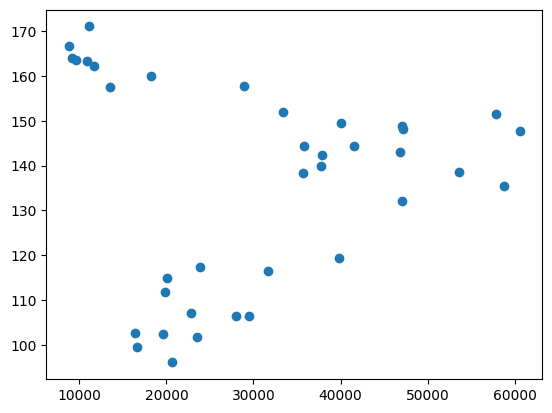

In [255]:
plt.scatter(btc_spy_slice['BTC'], btc_spy_slice['TLT'])
plt.show
corr_btc_tlt = st.pearsonr(btc_spy_slice['BTC'], btc_spy_slice['TLT'])
print(f"The correlation between both factors is {round(corr_btc_tlt[0],2)}")

In [256]:
corr_btc_tlt

PearsonRResult(statistic=0.012811304470341458, pvalue=0.9400106945485417)

In [257]:
# Also run rolling correlations

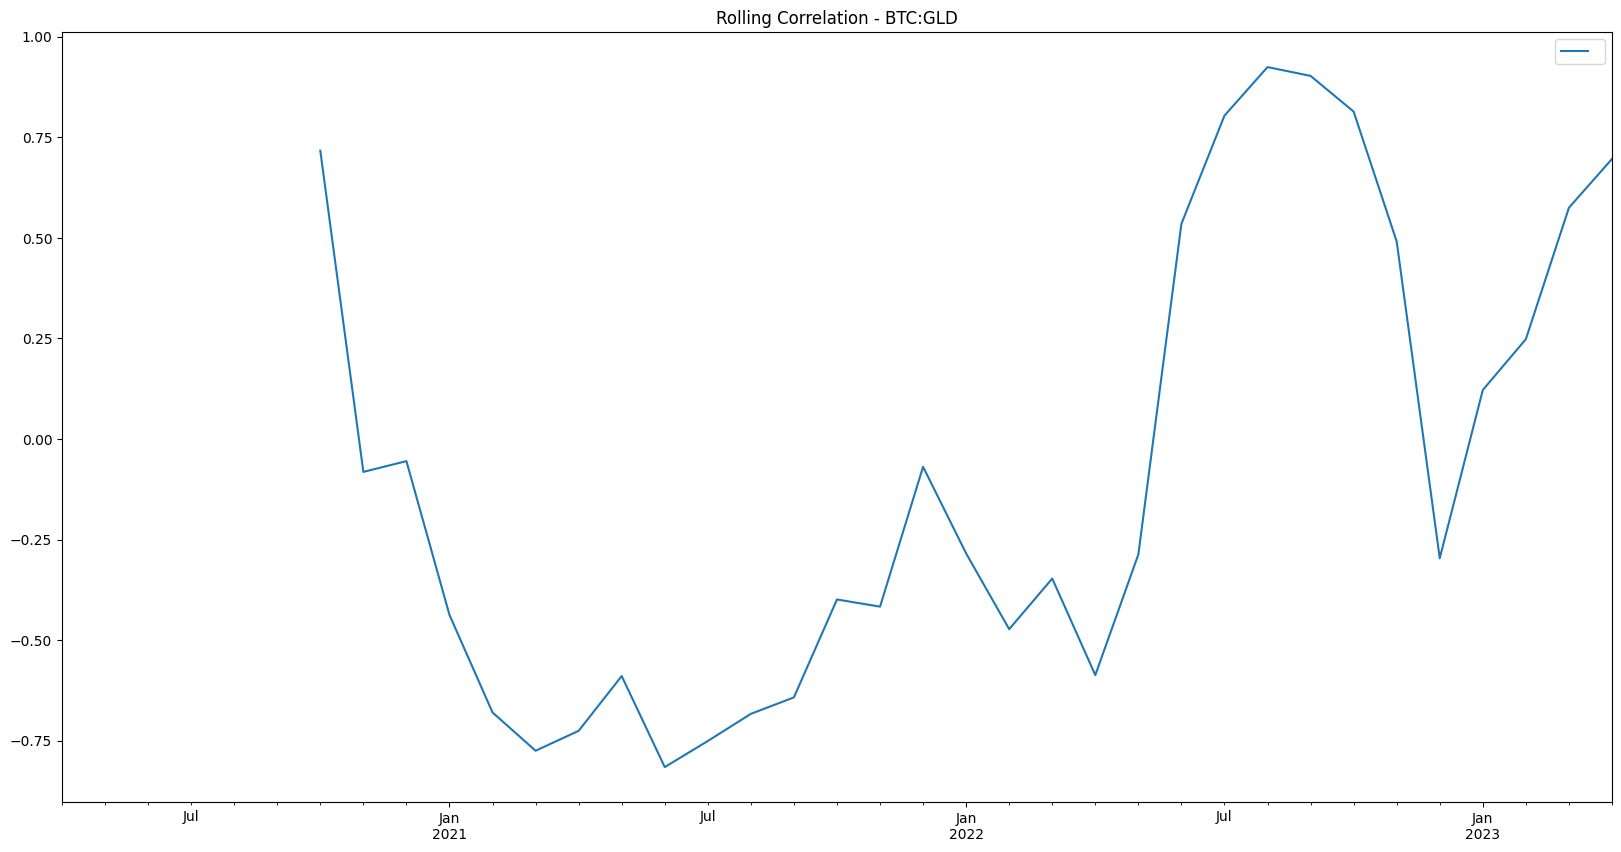

In [258]:
# Calculate the rolling standard deviation for all portfolios using a 7-day window
rolling_btc_gld = btc_spy_slice['BTC'].rolling(7).corr(btc_spy_slice['GLD']).plot(figsize=(20,10), legend=True, title="Rolling Correlation - BTC:GLD")

# Plot the rolling standard deviation
rolling_btc_gld;
# plt.savefig("Images/RollingSTD.png")

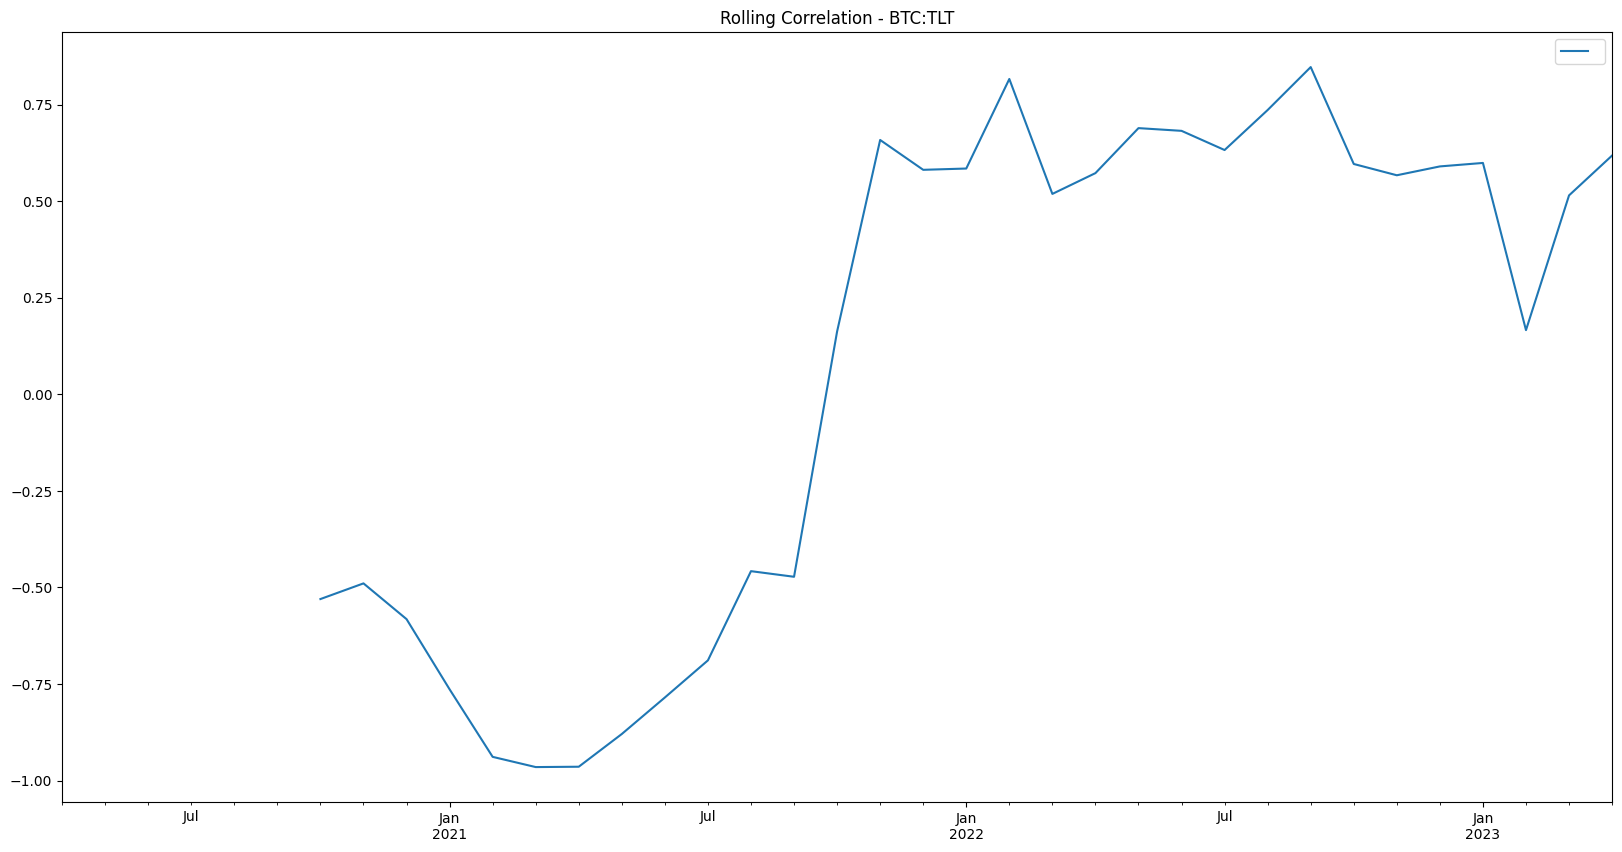

In [259]:
# Calculate the rolling standard deviation for all portfolios using a 7-day window
rolling_btc_tlt = btc_spy_slice['BTC'].rolling(7).corr(btc_spy_slice['TLT']).plot(figsize=(20,10), legend=True, title="Rolling Correlation - BTC:TLT")

# Plot the rolling standard deviation
rolling_btc_tlt;
# plt.savefig("Images/RollingSTD.png")

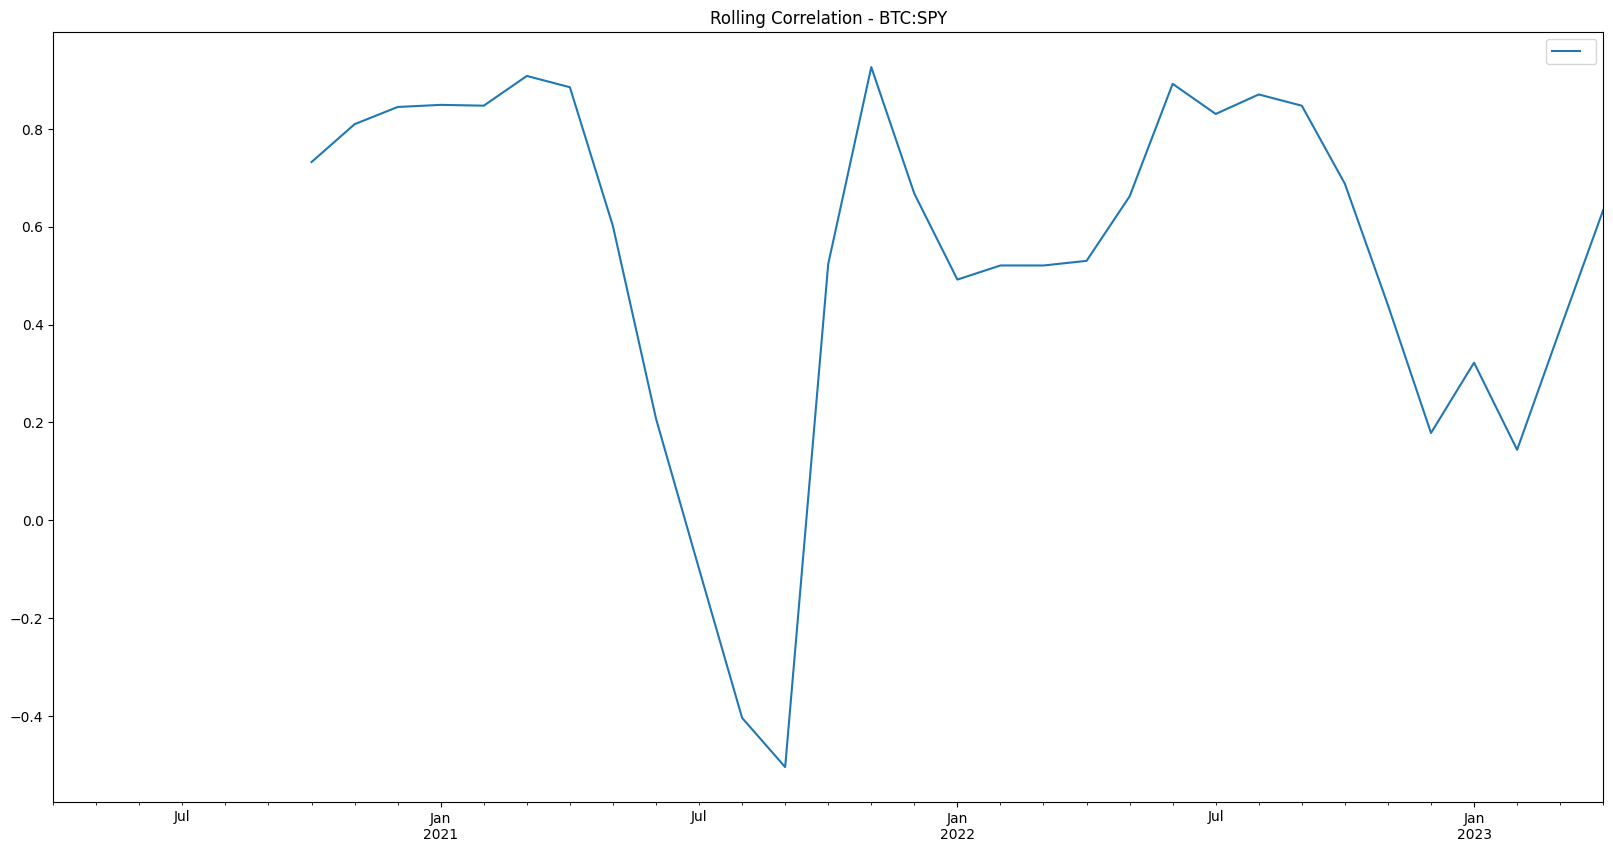

In [260]:
# Calculate the rolling standard deviation for all portfolios using a 7-day window
rolling_btc_spy = btc_spy_slice['BTC'].rolling(7).corr(btc_spy_slice['SPY']).plot(figsize=(20,10), legend=True, title="Rolling Correlation - BTC:SPY")

# Plot the rolling standard deviation
rolling_btc_spy;
# plt.savefig("Images/RollingSTD.png")

In [261]:
new_q

Value
Date                  
2010-08-18      0.0688
2010-08-19      0.0667
2010-08-20      0.0700
2010-08-21      0.0664
2010-08-22      0.0660
...                ...
2023-04-26  28301.7100
2023-04-27  28429.7200
2023-04-28  29480.3500
2023-04-29  29329.6300
2023-04-30  29244.6800

[4639 rows x 1 columns]

In [262]:
# Plotly - BTC Price - All Time
fig_newq = px.line(new_q, 
  y="Value",
#   x=btc_nov_round.index,
  title="BTC Price - All Time",
  template="simple_white",
  labels={"Value": "Price Level (USD)"},
  width=900, 
  height=800,
            )

# fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_newq.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [263]:
# Plotly - BTC Price (Log) - All Time
fig_newq = px.line(new_q, 
  y="Value",
#   x=btc_nov_round.index,
  title="BTC Price (Log) - All Time",
  template="simple_white",
  labels={"Value": "Price Level (USD)"},
  width=900, 
  height=800,
  log_y=True
            )

# fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_newq.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [264]:
# Bull and Bear - 2013 to 2016
newq_2013_slice = new_q['2013-06-01':'2016-06-01']
newq_2013_slice

Value
Date                 
2013-06-01  120.60293
2013-06-02  129.30000
2013-06-03  120.56663
2013-06-04  122.40510
2013-06-05  121.42000
...               ...
2016-05-28  522.43000
2016-05-29  526.64000
2016-05-30  525.15000
2016-05-31  531.15000
2016-06-01  531.97000

[1097 rows x 1 columns]

In [266]:
# Plotly - BTC Price - 2013 to 2016
fig_newq_2013_slice = px.line(newq_2013_slice, 
  y="Value",
#   x=btc_nov_round.index,
  title="BTC Price - 2013 to 2016",
  template="simple_white",
  labels={"Value": "Price Level (USD)"},
  width=900, 
  height=800,
            )

# fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_newq_2013_slice.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [267]:
newq_2013_slice.max()

Value    1151.0
dtype: float64

In [268]:
newq_2013_slice[newq_2013_slice['Value'] == 1151]

Value
Date              
2013-12-03  1151.0

In [269]:
# Isolating Bear Min
newq_2016_slice = new_q['2014-09-01':'2016-06-01']
newq_2016_slice

Value
Date              
2014-09-01  478.87
2014-09-02  472.76
2014-09-03  486.00
2014-09-04  474.50
2014-09-05  481.09
...            ...
2016-05-28  522.43
2016-05-29  526.64
2016-05-30  525.15
2016-05-31  531.15
2016-06-01  531.97

[640 rows x 1 columns]

In [270]:
# Plotly - BTC Price - 2014 to 2016 - Isolating Bear Min
fig_newq_2016_slice = px.line(newq_2016_slice, 
  y="Value",
#   x=btc_nov_round.index,
  title="BTC Price - 2014 to 2016",
  template="simple_white",
  labels={"Value": "Price Level (USD)"},
  width=900, 
  height=800,
            )

# fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_newq_2016_slice.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [271]:
newq_2016_slice.min()

Value    176.5
dtype: float64

In [272]:
newq_2016_slice[newq_2016_slice['Value'] == 176.5]

Value
Date             
2015-01-13  176.5

In [273]:
max_min_2015 = new_q['2013-12-03':'2015-01-13']
max_min_2015

Value
Date               
2013-12-03  1151.00
2013-12-04  1028.34
2013-12-05  1136.90
2013-12-06   727.29
2013-12-07   722.99
...             ...
2015-01-09   278.00
2015-01-10   272.25
2015-01-11   275.97
2015-01-12   230.89
2015-01-13   176.50

[407 rows x 1 columns]

In [274]:
# 2015 Max Drawdown
max_min_pct = max_min_2015.pct_change()
max_min_pct

Value
Date                
2013-12-03       NaN
2013-12-04 -0.106568
2013-12-05  0.105568
2013-12-06 -0.360287
2013-12-07 -0.005912
...              ...
2015-01-09 -0.067083
2015-01-10 -0.020683
2015-01-11  0.013664
2015-01-12 -0.163351
2015-01-13 -0.235567

[407 rows x 1 columns]

In [275]:
# 2015 Drawdown Cumprod
max_min_2015_cumprod = (1 + max_min_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
max_min_2015_round = round((max_min_2015_cumprod*100)-100,2)
max_min_2015_round

Value
Date             
2013-12-03    NaN
2013-12-04 -10.66
2013-12-05  -1.23
2013-12-06 -36.81
2013-12-07 -37.19
...           ...
2015-01-09 -75.85
2015-01-10 -76.35
2015-01-11 -76.02
2015-01-12 -79.94
2015-01-13 -84.67

[407 rows x 1 columns]

In [276]:
max_min_2015_round.min()

Value   -84.67
dtype: float64

In [277]:
# Grabbing SPY Data from Quandl - this only grabbed one month of data from 2017 for some reason - going to try yfinance
spy_q = quandl.get('BCIW/_INX')  # Format is: `DATABASE_CODE/DATASET_CODE`
spy_q.head()

Open     High      Low    Close        Volume
Date                                                        
2017-01-03  2251.57  2263.88  2245.13  2257.83  2.318948e+09
2017-01-04  2261.60  2272.82  2261.60  2270.75  2.097360e+09
2017-01-05  2268.18  2271.50  2260.45  2269.00  2.187190e+09
2017-01-06  2271.14  2282.10  2264.06  2276.98  1.957181e+09
2017-01-09  2273.59  2275.49  2268.90  2268.90  1.914652e+09

In [278]:
yf_sp500data = yf.download("^GSPC")
yf_sp500data.head()

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
1927-12-30  17.660000  17.660000  17.660000  17.660000  17.660000       0
1928-01-03  17.760000  17.760000  17.760000  17.760000  17.760000       0
1928-01-04  17.719999  17.719999  17.719999  17.719999  17.719999       0
1928-01-05  17.549999  17.549999  17.549999  17.549999  17.549999       0
1928-01-06  17.660000  17.660000  17.660000  17.660000  17.660000       0

In [279]:
yf_sp500data_slice = yf_sp500data['Close']
yf_sp500data_slice

Date
1927-12-30      17.660000
1928-01-03      17.760000
1928-01-04      17.719999
1928-01-05      17.549999
1928-01-06      17.660000
                 ...     
2023-04-24    4137.040039
2023-04-25    4071.629883
2023-04-26    4055.989990
2023-04-27    4135.350098
2023-04-28    4169.479980
Name: Close, Length: 23946, dtype: float64

In [280]:
yf_sp500data_pct = yf_sp500data_slice.pct_change()
yf_sp500data_pct.head()

Date
1927-12-30         NaN
1928-01-03    0.005663
1928-01-04   -0.002252
1928-01-05   -0.009594
1928-01-06    0.006268
Name: Close, dtype: float64

In [281]:
# S&P 500 All Time Returns
spy_all_cumprod = (1 + yf_sp500data_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
spy_all_round = round((spy_all_cumprod*100)-100,2)
spy_all_round

Date
1927-12-30         NaN
1928-01-03        0.57
1928-01-04        0.34
1928-01-05       -0.62
1928-01-06       -0.00
                ...   
2023-04-24    23326.05
2023-04-25    22955.66
2023-04-26    22867.10
2023-04-27    23316.48
2023-04-28    23509.74
Name: Close, Length: 23946, dtype: float64

In [282]:
# S&P 500 all time returns divided by number of years - 244% per year returns?
spy_all_round['2023-04-24']/95

245.53736842105263

In [283]:
new_q.head()

Value
Date              
2010-08-18  0.0688
2010-08-19  0.0667
2010-08-20  0.0700
2010-08-21  0.0664
2010-08-22  0.0660

In [284]:
yf_sp500_2010 = yf_sp500data_slice['2010-08-18':]
yf_sp500_2010

Date
2010-08-18    1094.160034
2010-08-19    1075.630005
2010-08-20    1071.689941
2010-08-23    1067.359985
2010-08-24    1051.869995
                 ...     
2023-04-24    4137.040039
2023-04-25    4071.629883
2023-04-26    4055.989990
2023-04-27    4135.350098
2023-04-28    4169.479980
Name: Close, Length: 3196, dtype: float64

In [285]:
yf_sp500_2010pct = yf_sp500_2010.pct_change()
yf_sp500_2010pct.head()

Date
2010-08-18         NaN
2010-08-19   -0.016935
2010-08-20   -0.003663
2010-08-23   -0.004040
2010-08-24   -0.014512
Name: Close, dtype: float64

In [286]:
# SP500 daily gains
yf_sp500_greater = yf_sp500_2010pct[yf_sp500_2010pct > 0]
yf_sp500_greater.head()

Date
2010-08-25    0.003289
2010-08-27    0.016587
2010-08-31    0.000391
2010-09-01    0.029505
2010-09-02    0.009081
Name: Close, dtype: float64

In [287]:
# SP500 daily losses
yf_sp500_lesser = yf_sp500_2010pct[yf_sp500_2010pct < 0]
yf_sp500_lesser.head()

Date
2010-08-19   -0.016935
2010-08-20   -0.003663
2010-08-23   -0.004040
2010-08-24   -0.014512
2010-08-26   -0.007685
Name: Close, dtype: float64

In [288]:
yf_sp500_greater.describe()

count    1731.000000
mean        0.007181
std         0.007733
min         0.000005
25%         0.002169
50%         0.005022
75%         0.009926
max         0.093828
Name: Close, dtype: float64

In [289]:
yf_sp500_lesser.describe()

count    1463.000000
mean       -0.007447
std         0.009101
min        -0.119841
25%        -0.009725
50%        -0.004430
75%        -0.001714
max        -0.000007
Name: Close, dtype: float64

In [290]:
# Maybe compare time to recover 70% to 90% drawdowns in btc vs spy or other asset classes
# In $10k principal invested example above the current principal balance is around 42% of high as of 4/25/23

In [291]:
stock_index

symbol    open      high       low   close      volume  \
timestamp                                                           
2020-04-08    GLD  155.91  155.9400  154.5900  154.65   7600804.0   
2020-04-09    GLD  158.08  159.0800  157.2100  158.58  18123039.0   
2020-04-13    GLD  159.17  162.3800  158.6250  161.41  20549213.0   
2020-04-14    GLD  162.73  164.4200  161.7800  162.66  17095086.0   
2020-04-15    GLD  161.80  162.5400  160.8061  162.00  12141890.0   
...           ...     ...       ...       ...     ...         ...   
2023-04-24    TLT  104.96  105.4875  104.8400  105.41  17035762.0   
2023-04-25    TLT  106.33  107.1300  106.2800  106.96  21908546.0   
2023-04-26    TLT  106.79  107.2400  105.6700  105.82  19615333.0   
2023-04-27    TLT  105.20  105.2700  104.6100  104.77  20247619.0   
2023-04-28    TLT  106.21  106.7600  105.8600  106.46  23824193.0   

            trade_count        vwap  
timestamp                            
2020-04-08      60704.0  155.233884  
2020-04-09     140239.0  158.255634  
2020-04-13     140401.0  160.906373  
2020-04-14     146336.0  163.197557  
2020-04-15      95518.0  161.749049  
...                 ...         ...  
2023-04-24      83376.0  105.290770  
2023-04-25     141017.0  106.836469  
2023-04-26     117843.0  106.235620  
2023-04-27     108852.0  104.854365  
2023-04-28     128162.0  106.340339  

[2310 rows x 8 columns]

In [292]:
stock_monthly = stock_index.resample('BM').apply(lambda x: x[-1])
stock_monthly.head()

symbol    open      high      low   close      volume  trade_count  \
timestamp                                                                       
2020-04-30    TLT  168.74  169.2300  166.710  166.74  11606074.0      62765.0   
2020-05-29    TLT  162.71  164.0900  162.355  163.59  14662054.0      75454.0   
2020-06-30    TLT  165.23  165.2900  163.480  163.93  14841678.0      79244.0   
2020-07-31    TLT  170.15  171.4554  169.940  171.00   8886264.0      57269.0   
2020-08-31    TLT  161.60  163.2500  161.560  162.19  11388108.0      75800.0   

                  vwap  
timestamp               
2020-04-30  167.875507  
2020-05-29  163.264590  
2020-06-30  164.132873  
2020-07-31  170.685787  
2020-08-31  162.449506

In [293]:
# run corr of fbs to btc - scatterplot?

In [294]:
# run corr of 2yr to btc?

In [295]:
btc_df

symbol  timestamp      open      high       low     close       volume  \
0     BTC/USD 2020-04-08   7314.00   7314.00   7314.00   7314.00      0.00010   
1     BTC/USD 2020-04-14   7101.50   7101.50   7100.00   7100.00      0.00020   
2     BTC/USD 2020-04-22   7118.50   7118.50   7118.50   7118.50      0.00010   
3     BTC/USD 2020-04-28   7748.50   7836.00   7748.50   7836.00      0.08400   
4     BTC/USD 2020-04-30   8829.00   8829.00   8653.00   8653.00      0.01340   
...       ...        ...       ...       ...       ...       ...          ...   
1083  BTC/USD 2023-04-26  28347.67  30046.27  27261.01  29119.00  18213.97439   
1084  BTC/USD 2023-04-27  29119.00  29912.28  28646.88  29537.16  12426.37468   
1085  BTC/USD 2023-04-28  29542.61  29608.47  28922.03  29420.00   5359.16699   
1086  BTC/USD 2023-04-29  29422.55  29478.08  29082.47  29253.01   1871.82263   
1087  BTC/USD 2023-04-30  29253.22  29985.57  29195.13  29439.76   3663.25326   

      trade_count          vwap  
0             1.0   7314.000000  
1             2.0   7100.750000  
2             1.0   7118.500000  
3             2.0   7835.687500  
4             3.0   8715.805970  
...           ...           ...  
1083     293900.0  28896.311317  
1084     191033.0  29293.601142  
1085      89234.0  29297.208936  
1086      41177.0  29292.215641  
1087      69085.0  29546.320019  

[1088 rows x 9 columns]

In [296]:
# covid lows
data_lows = data_q['2020-03-01':'2020-04-01']
data_lows

Value
Date               
2020-03-01  8534.17
2020-03-02  8912.82
2020-03-03  8912.82
2020-03-04  8754.34
2020-03-05  8758.90
2020-03-06  9067.39
2020-03-07  9155.89
2020-03-08  8898.63
2020-03-09  8039.38
2020-03-10  7931.94
2020-03-11  7885.46
2020-03-12  7936.65
2020-03-13  4830.21
2020-03-14  5609.03
2020-03-15  5166.26
2020-03-16  5348.44
2020-03-17  5026.35
2020-03-18  5357.61
2020-03-19  5410.23
2020-03-20  6195.20
2020-03-21  6226.44
2020-03-22  6189.85
2020-03-23  5822.62
2020-03-24  6502.16
2020-03-25  6768.49
2020-03-26  6698.46
2020-03-27  6763.75
2020-03-28  6369.09
2020-03-29  6260.95
2020-03-30  5885.41
2020-03-31  6405.29
2020-04-01  6428.28

In [297]:
min_df = pd.DataFrame({'gld_min': [0,1,2],
                       'tlt_min': [1,2,3],
                       'spy_min': [2,3,4]})
min_df

gld_min  tlt_min  spy_min
0        0        1        2
1        1        2        3
2        2        3        4

In [298]:
# initialize data of lists.
datas = {'Name': ['Tom', 'nick', 'krish', 'jack'],
        'Age': [20, 21, 19, 18]}
  
# Create DataFrame
dfs = pd.DataFrame(datas)
  
# Print the output.
dfs

Name  Age
0    Tom   20
1   nick   21
2  krish   19
3   jack   18

In [299]:
# Month end dates plus 5/29
month_end_df = stock_df.loc[(stock_df.timestamp.dt.is_month_end) | (stock_df.timestamp.dt.day == 15), :]
month_end_df

symbol  timestamp    open      high       low   close      volume  \
4       GLD 2020-04-15  161.80  162.5400  160.8061  162.00  12141890.0   
15      GLD 2020-04-30  160.22  160.8200  158.1300  158.80  13633483.0   
26      GLD 2020-05-15  164.02  164.8000  163.0800  163.93  13918816.0   
46      GLD 2020-06-15  160.52  162.5600  160.1600  162.33   8538826.0   
57      GLD 2020-06-30  166.31  167.9906  166.1850  167.37  12762597.0   
...     ...        ...     ...       ...       ...     ...         ...   
2248    TLT 2023-01-31  106.98  107.2800  105.8700  107.17  13706800.0   
2259    TLT 2023-02-15  103.55  103.9500  102.4950  103.05  15881281.0   
2267    TLT 2023-02-28  100.57  101.7200  100.2800  101.71  14956342.0   
2278    TLT 2023-03-15  106.78  107.7100  105.3450  106.10  45174032.0   
2290    TLT 2023-03-31  105.35  106.5600  105.0750  106.37  22338075.0   

      trade_count        vwap  
4         95518.0  161.749049  
15       107884.0  159.269773  
26       103072.0  164.068763  
46        60744.0  161.585502  
57        84161.0  167.268997  
...           ...         ...  
2248      90604.0  106.551306  
2259     102691.0  103.037636  
2267     100754.0  101.091431  
2278     339908.0  106.690206  
2290     125397.0  105.921266  

[156 rows x 9 columns]

In [300]:
month_end_df.tail(33)

symbol  timestamp      open     high      low   close      volume  \
1838    TLT 2021-06-15  140.8000  141.090  140.480  141.05  18177787.0   
1849    TLT 2021-06-30  144.2500  144.930  144.070  144.35  15707427.0   
1859    TLT 2021-07-15  147.9500  148.600  147.030  148.49  18454932.0   
1892    TLT 2021-08-31  149.6700  150.090  148.500  148.83  15253807.0   
1902    TLT 2021-09-15  151.2100  151.250  149.930  150.58  11936274.0   
1913    TLT 2021-09-30  144.1000  144.515  143.650  144.32  22513240.0   
1924    TLT 2021-10-15  145.0000  145.140  144.470  145.03  11794328.0   
1945    TLT 2021-11-15  146.8900  146.960  145.220  145.48  15229963.0   
1955    TLT 2021-11-30  150.8300  152.070  150.250  151.59  31467481.0   
1966    TLT 2021-12-15  149.6139  150.790  149.130  149.25  25368709.0   
1977    TLT 2021-12-31  147.8100  149.030  147.430  148.19  13395043.0   
1997    TLT 2022-01-31  142.1800  142.950  141.960  142.39  13985524.0   
2008    TLT 2022-02-15  135.6000  135.840  134.940  134.98  18124291.0   
2016    TLT 2022-02-28  138.4300  140.045  138.320  139.87  25520768.0   
2027    TLT 2022-03-15  132.8600  133.150  131.190  131.53  17260850.0   
2039    TLT 2022-03-31  131.9800  132.670  131.660  132.08  19893042.0   
2080    TLT 2022-05-31  117.1800  117.230  115.928  116.56  28249674.0   
2091    TLT 2022-06-15  110.0850  110.990  109.030  110.84  24146569.0   
2101    TLT 2022-06-30  114.8590  115.770  114.750  114.87  25802876.0   
2111    TLT 2022-07-15  115.8400  116.820  115.600  116.14  16022586.0   
2132    TLT 2022-08-15  116.3300  116.745  115.450  115.45   9031814.0   
2144    TLT 2022-08-31  112.6900  113.340  111.575  111.88  13617930.0   
2154    TLT 2022-09-15  107.8500  108.190  107.580  107.97  10394405.0   
2165    TLT 2022-09-30  104.2700  104.860  102.225  102.45  26484990.0   
2186    TLT 2022-10-31   96.3600   96.620   95.030   96.11  23956265.0   
2197    TLT 2022-11-15   98.2500   99.300   98.110   99.23  26585624.0   
2207    TLT 2022-11-30  101.6150  102.730  101.370  102.73  21594217.0   
2218    TLT 2022-12-15  108.3900  109.120  108.160  108.32  20255470.0   
2248    TLT 2023-01-31  106.9800  107.280  105.870  107.17  13706800.0   
2259    TLT 2023-02-15  103.5500  103.950  102.495  103.05  15881281.0   
2267    TLT 2023-02-28  100.5700  101.720  100.280  101.71  14956342.0   
2278    TLT 2023-03-15  106.7800  107.710  105.345  106.10  45174032.0   
2290    TLT 2023-03-31  105.3500  106.560  105.075  106.37  22338075.0   

      trade_count        vwap  
1838      63501.0  140.863603  
1849      76777.0  144.486788  
1859      83696.0  148.104619  
1892      80103.0  148.996281  
1902      72162.0  150.558290  
1913     109556.0  144.155056  
1924      64608.0  144.873370  
1945      85769.0  145.786411  
1955     218198.0  151.399185  
1966     159167.0  149.983254  
1977      80937.0  148.211890  
1997      85292.0  142.435123  
2008      98264.0  135.321390  
2016     145092.0  139.369096  
2027     121898.0  131.956025  
2039     135009.0  132.282619  
2080     129017.0  116.706060  
2091     163693.0  109.876568  
2101     125548.0  115.303059  
2111      86522.0  116.227225  
2132      55570.0  116.024302  
2144      88542.0  112.351215  
2154      68284.0  107.872767  
2165     176869.0  103.216833  
2186     139205.0   95.885319  
2197     155459.0   98.868782  
2207     143566.0  102.184996  
2218     112012.0  108.578492  
2248      90604.0  106.551306  
2259     102691.0  103.037636  
2267     100754.0  101.091431  
2278     339908.0  106.690206  
2290     125397.0  105.921266

In [301]:
Introducing MSTR
TSLA?
BTC : SPY ratio


SyntaxError: invalid syntax (813749698.py, line 1)

In [ ]:
# Filtering for month start dates
spy_monthly = stock_df[if stock_df['timestamp'] == stock_df['timestamp'].dt.is_month_start 
                       then stock_df['timestamp'].dt.is_month_start
                      
                      
                      
                      
                      ] 
spy_monthly

In [ ]:
# Subset of SPY only
spy_df = spy_monthly.loc[(spy_monthly.symbol == 'SPY'), :]
spy_df